In [ ]:
import pandas as pd
import numpy as np

# 1. Load the data
# Adjust the paths if your files are in a different folder
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
    print("✅ Data loaded successfully.")
except:
    # Fallback for your specific folder structure
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
    print("✅ Data loaded from subfolder.")

# 2. Focus on target02
target_name = 'target02'
df = X.copy()
df[target_name] = y[target_name]

# 3. Find the features with the strongest relationship
correlations = df.corr()[target_name].abs().sort_values(ascending=False)

print(f"\n--- Top 5 Features driving {target_name} ---")
print(correlations.head(6)) # The first one is target02 itself

In [ ]:
%pip install matplotlib
!pip install seaborn

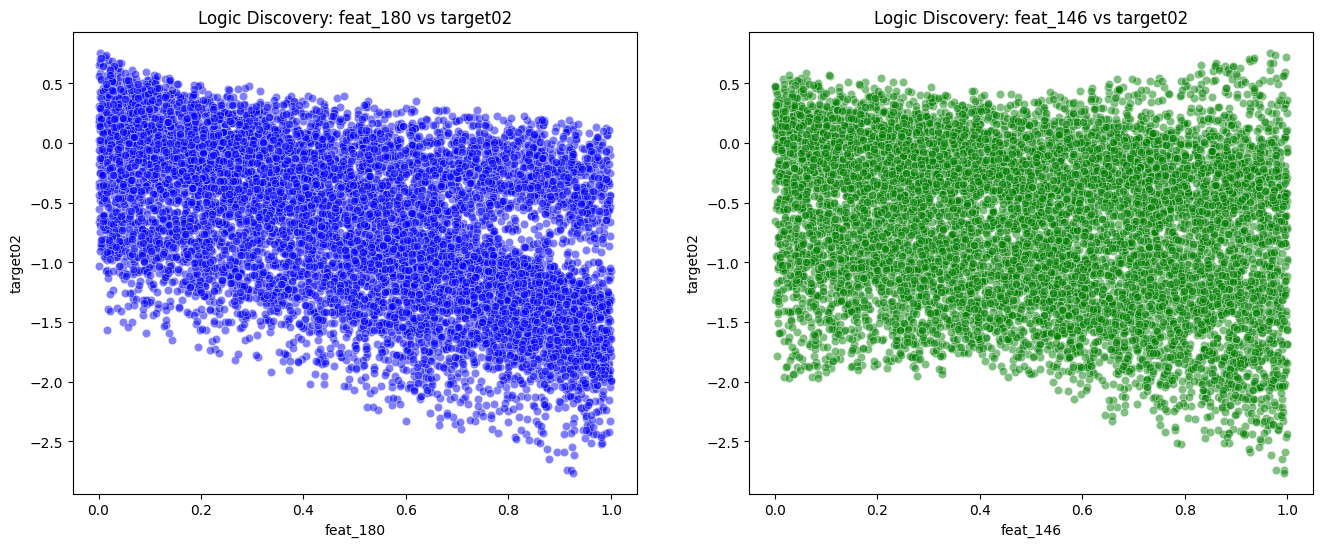

Checking unique values for binary suspects:
feat_34: [1. 0.]
feat_84: [1. 0.]
feat_150: [1. 0.]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reload the data to be safe
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: feat_180 vs target02
sns.scatterplot(x=df['feat_180'], y=df['target02'], ax=ax1, color='blue', alpha=0.5)
ax1.set_title('Logic Discovery: feat_180 vs target02')

# Plot 2: feat_146 vs target02
sns.scatterplot(x=df['feat_146'], y=df['target02'], ax=ax2, color='green', alpha=0.5)
ax2.set_title('Logic Discovery: feat_146 vs target02')

plt.show()

# 3. Check for specific binary switch suspects
binary_suspects = ['feat_34', 'feat_84', 'feat_150']
print("Checking unique values for binary suspects:")
for feat in binary_suspects:
    print(f"{feat}: {df[feat].unique()}")

branch 1


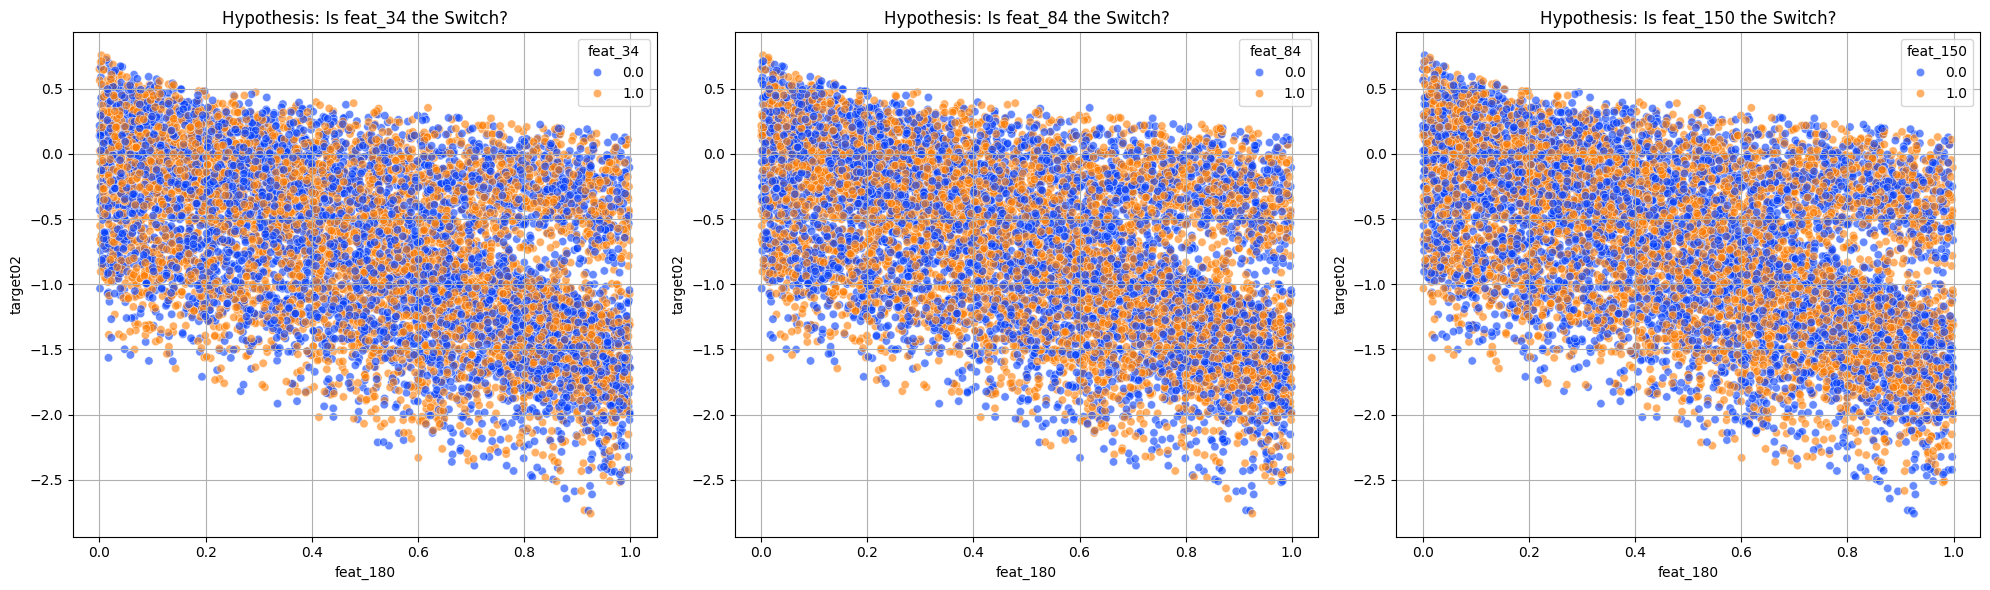

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Setup Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Define the Suspects
binary_suspects = ['feat_34', 'feat_84', 'feat_150']
main_driver = 'feat_180'

# 3. The Forensic Plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, suspect in enumerate(binary_suspects):
    # Plot: Driver vs Target, colored by Suspect
    sns.scatterplot(
        data=df, 
        x=main_driver, 
        y='target02', 
        hue=suspect, 
        palette='bright', 
        alpha=0.6, 
        ax=axes[i]
    )
    axes[i].set_title(f"Hypothesis: Is {suspect} the Switch?")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

brach 4 sign flip

In [4]:
import pandas as pd
import numpy as np

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# 2. Define the Main Driver
main_driver = 'feat_180'
target = y['target02']
print(f"Base Correlation ({main_driver} vs Target): {X[main_driver].corr(target):.4f}")

# 3. The "Interaction Scan"
# We test: target02 = feat_180 * feat_X
results = []

print("Scanning for Sign Flippers...")
for col in X.columns:
    if col == main_driver:
        continue
        
    # Create the interaction
    interaction = X[main_driver] * X[col]
    
    # Check correlation
    corr = interaction.corr(target)
    results.append({'feature': col, 'correlation': corr, 'abs_corr': abs(corr)})

# 4. Show the Verdict
results_df = pd.DataFrame(results).sort_values('abs_corr', ascending=False)
print("\n--- TOP 5 INTERACTION CANDIDATES ---")
print(results_df.head(5))

# Check for a "Perfect Match"
best_candidate = results_df.iloc[0]
if best_candidate['abs_corr'] > 0.99:
    print(f"\n🎉 SOLVED! The formula is likely: target02 = {main_driver} * {best_candidate['feature']}")
else:
    print("\n❌ BRANCH 4 FAILED. No simple multiplication found.")

Base Correlation (feat_180 vs Target): -0.5123
Scanning for Sign Flippers...

--- TOP 5 INTERACTION CANDIDATES ---
      feature  correlation  abs_corr
80    feat_80    -0.511974  0.511974
146  feat_146    -0.490209  0.490209
165  feat_165    -0.347832  0.347832
149  feat_149    -0.347814  0.347814
124  feat_124    -0.347490  0.347490

❌ BRANCH 4 FAILED. No simple multiplication found.


brach 2 linear combination

In [7]:
%pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl (8.7 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# 2. Select the Top Suspects (found in previous steps)
# Based on your previous output: feat_180, feat_146, feat_80
features = ['feat_180', 'feat_146', 'feat_80']
target = y['target02']

print(f"--- INVESTIGATING LINEAR COMBINATION: {features} ---")

# 3. Fit Linear Regression
model = LinearRegression()
model.fit(X[features], target)

# 4. Evaluate
r2 = model.score(X[features], target)
print(f"R-Squared Score: {r2:.6f}")

# 5. Show the Formula (if it works)
print("\nDerived Formula:")
formula = f"target02 = {model.intercept_:.4f}"
for name, coef in zip(features, model.coef_):
    formula += f" + ({coef:.4f} * {name})"
print(formula)

# 6. Verdict
if r2 > 0.99:
    print("\n🎉 SOLVED! It is a simple linear formula.")
else:
    print("\n❌ BRANCH 2 FAILED. It is NOT a simple sum of features.")
    print("Moving to Branch 3 (Conditional Thresholds)...")

--- INVESTIGATING LINEAR COMBINATION: ['feat_180', 'feat_146', 'feat_80'] ---
R-Squared Score: 0.350724

Derived Formula:
target02 = 0.3457 + (-1.1405 * feat_180) + (-0.5258 * feat_146) + (-0.4250 * feat_80)

❌ BRANCH 2 FAILED. It is NOT a simple sum of features.
Moving to Branch 3 (Conditional Thresholds)...


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


The Test The "Tree Detective"

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# Check for Infs/NaNs (explains your previous warnings)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index] # Align target

print(f"--- INVESTIGATING CONDITIONAL LOGIC (Decision Tree) ---")

# 2. Train a small "Detective" Tree
# We look for the TOP 3 features derived from the tree
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X, y['target02'])

# 3. Check the Score
r2 = tree.score(X, y['target02'])
print(f"Decision Tree R-Squared: {r2:.6f}")

# 4. Reveal the Logic
if r2 > 0.85:
    print("\n🎉 WE FOUND THE LOGIC! Here are the rules:")
    print(export_text(tree, feature_names=list(X.columns)))
else:
    print(f"\n❌ BRANCH 3 FAILED. Score ({r2:.4f}) is too low.")
    print("This means the logic is continuous (math) not just rules.")

--- INVESTIGATING CONDITIONAL LOGIC (Decision Tree) ---
Decision Tree R-Squared: 0.722521

❌ BRANCH 3 FAILED. Score (0.7225) is too low.
This means the logic is continuous (math) not just rules.


branch 3 4

In [10]:
# Run this to see the "Secret Rules" found by the tree
from sklearn.tree import export_text

# (Assuming 'tree' and 'X' are still in memory from the previous step)
# If not, the previous code block needs to be re-run briefly.
print(export_text(tree, feature_names=list(X.columns)))

|--- feat_180 <= 0.46
|   |--- feat_80 <= 0.70
|   |   |--- feat_80 <= 0.20
|   |   |   |--- value: [-0.78]
|   |   |--- feat_80 >  0.20
|   |   |   |--- value: [-0.03]
|   |--- feat_80 >  0.70
|   |   |--- feat_146 <= 0.46
|   |   |   |--- value: [-0.28]
|   |   |--- feat_146 >  0.46
|   |   |   |--- value: [-1.07]
|--- feat_180 >  0.46
|   |--- feat_80 <= 0.50
|   |   |--- feat_80 <= 0.20
|   |   |   |--- value: [-1.33]
|   |   |--- feat_80 >  0.20
|   |   |   |--- value: [-0.23]
|   |--- feat_80 >  0.50
|   |   |--- feat_180 <= 0.77
|   |   |   |--- value: [-1.10]
|   |   |--- feat_180 >  0.77
|   |   |   |--- value: [-1.53]



In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Apply the "Tree Split" (The Cut-off we found)
split_point = 0.46
features = ['feat_180', 'feat_80', 'feat_146'] # The suspects from the tree

group_low = df[df['feat_180'] <= split_point]
group_high = df[df['feat_180'] > split_point]

print(f"--- BRANCH 5: PIECEWISE LINEAR TEST (Split at {split_point}) ---")

# 3. Fit Linear Regression on Group LOW
model_low = LinearRegression()
model_low.fit(group_low[features], group_low['target02'])
r2_low = model_low.score(group_low[features], group_low['target02'])
print(f"\n[Low Group] (feat_180 <= {split_point})")
print(f"   R-Squared: {r2_low:.6f}")
print(f"   Formula: {model_low.intercept_:.4f} + ({model_low.coef_[0]:.4f} * feat_180) + ({model_low.coef_[1]:.4f} * feat_80) + ({model_low.coef_[2]:.4f} * feat_146)")

# 4. Fit Linear Regression on Group HIGH
model_high = LinearRegression()
model_high.fit(group_high[features], group_high['target02'])
r2_high = model_high.score(group_high[features], group_high['target02'])
print(f"\n[High Group] (feat_180 > {split_point})")
print(f"   R-Squared: {r2_high:.6f}")
print(f"   Formula: {model_high.intercept_:.4f} + ({model_high.coef_[0]:.4f} * feat_180) + ({model_high.coef_[1]:.4f} * feat_80) + ({model_high.coef_[2]:.4f} * feat_146)")

# 5. Verdict
if r2_low > 0.99 and r2_high > 0.99:
    print("\n🎉 SOLVED! We found the exact Piecewise Formula.")
else:
    print("\n❌ BRANCH 5 FAILED. The split helps, but it's not just linear yet.")

--- BRANCH 5: PIECEWISE LINEAR TEST (Split at 0.46) ---

[Low Group] (feat_180 <= 0.46)
   R-Squared: 0.163666
   Formula: 0.1867 + (-1.0969 * feat_180) + (-0.1375 * feat_80) + (-0.4998 * feat_146)

[High Group] (feat_180 > 0.46)
   R-Squared: 0.218823
   Formula: 0.4134 + (-1.0564 * feat_180) + (-0.6693 * feat_80) + (-0.5476 * feat_146)

❌ BRANCH 5 FAILED. The split helps, but it's not just linear yet.


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

In [12]:
import pandas as pd
import numpy as np
import itertools

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Define the Top Suspects (Based on previous analysis)
suspects = ['feat_180', 'feat_80', 'feat_146', 'feat_200', 'feat_214']
target = df['target02']

print(f"--- STARTING BRUTE-FORCE FORMULA SEARCH ---")
print(f"Suspects: {suspects}")

results = []

# 3. Helper function to check correlation
def check_formula(name, values):
    # Remove NaNs/Infs that might happen with division
    clean_mask = np.isfinite(values)
    if clean_mask.sum() < len(values) * 0.9: # If too many errors, skip
        return
    
    corr = np.corrcoef(values[clean_mask], target[clean_mask])[0, 1]
    results.append({'formula': name, 'score': abs(corr), 'sign': np.sign(corr)})

# 4. SEARCH LOOP
for col in suspects:
    # A. Single Features
    vals = df[col]
    check_formula(f"{col}", vals)
    
    # B. Squares and Roots
    check_formula(f"{col}^2", vals**2)
    check_formula(f"{col}^3", vals**3)
    check_formula(f"sqrt(abs({col}))", np.sqrt(np.abs(vals)))
    check_formula(f"1/{col}", 1/(vals+1e-9)) # Avoid div/0
    
    for col2 in suspects:
        if col == col2: continue
        
        vals2 = df[col2]
        
        # C. Two-Feature Math
        check_formula(f"{col} * {col2}", vals * vals2)
        check_formula(f"{col} / {col2}", vals / (vals2+1e-9))
        check_formula(f"{col} + {col2}", vals + vals2)
        check_formula(f"{col} - {col2}", vals - vals2)
        check_formula(f"{col}^2 * {col2}", (vals**2) * vals2)
        
        for col3 in suspects:
            if col3 in [col, col2]: continue
            vals3 = df[col3]
            
            # D. Three-Feature Math (The "Complex" Layer)
            check_formula(f"{col} * {col2} * {col3}", vals * vals2 * vals3)
            # check_formula(f"({col} + {col2}) * {col3}", (vals + vals2) * vals3)

# 5. Display Top 10 Winners
results_df = pd.DataFrame(results).sort_values('score', ascending=False)
print("\n--- TOP 10 DISCOVERED FORMULAS ---")
print(results_df.head(15))

--- STARTING BRUTE-FORCE FORMULA SEARCH ---
Suspects: ['feat_180', 'feat_80', 'feat_146', 'feat_200', 'feat_214']

--- TOP 10 DISCOVERED FORMULAS ---
                          formula     score  sign
10  feat_180 * feat_80 * feat_146  0.542547  -1.0
47  feat_80 * feat_180 * feat_146  0.542547  -1.0
92  feat_146 * feat_80 * feat_180  0.542547  -1.0
84  feat_146 * feat_180 * feat_80  0.542547  -1.0
55  feat_80 * feat_146 * feat_180  0.542547  -1.0
18  feat_180 * feat_146 * feat_80  0.542547  -1.0
46           feat_80^2 * feat_180  0.527619  -1.0
81            feat_146 + feat_180  0.527128  -1.0
15            feat_180 + feat_146  0.527128  -1.0
9            feat_180^2 * feat_80  0.523236  -1.0
0                        feat_180  0.512340  -1.0
5              feat_180 * feat_80  0.511974  -1.0
42             feat_80 * feat_180  0.511974  -1.0
3             sqrt(abs(feat_180))  0.503271  -1.0
7              feat_180 + feat_80  0.496298  -1.0


--- TARGET ANALYSIS ---
count    10000.000000
mean        -0.701182
std          0.652842
min         -2.761044
25%         -1.204635
50%         -0.632364
75%         -0.172705
max          0.757761
Name: target02, dtype: float64

Unique Values (Rounded to 3 decimals): 2603


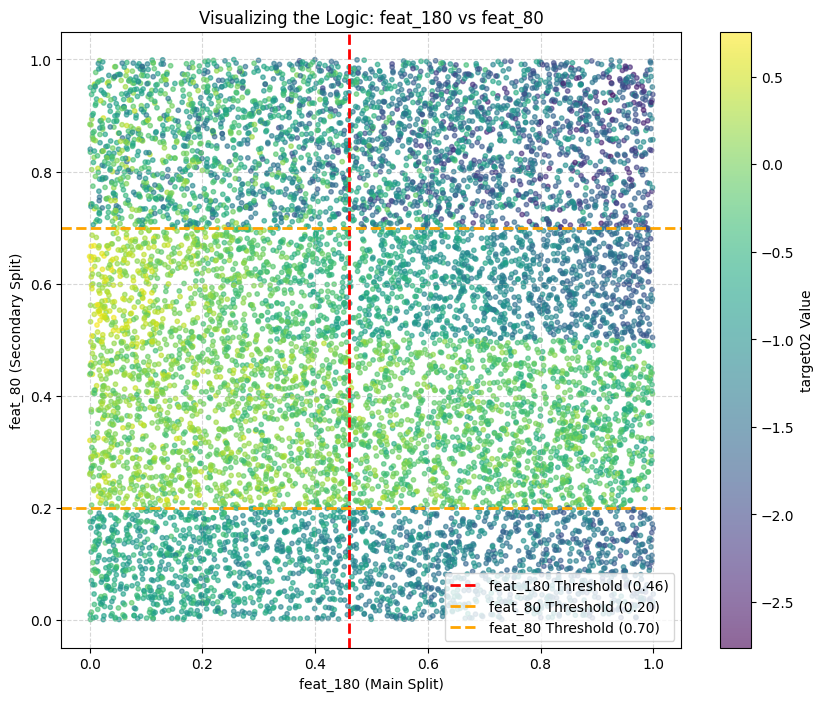

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Check Target Distribution (Is it discrete?)
print("--- TARGET ANALYSIS ---")
print(df['target02'].describe())
print(f"\nUnique Values (Rounded to 3 decimals): {df['target02'].round(3).nunique()}")

# 3. The 2D Logic Map
# We focus on the Top 2 features identified by the Tree
feat_x = 'feat_180'
feat_y = 'feat_80'

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df[feat_x], 
    df[feat_y], 
    c=df['target02'], 
    cmap='viridis', # 'viridis' makes High=Yellow, Low=Purple
    s=10, 
    alpha=0.6
)
plt.colorbar(scatter, label='target02 Value')
plt.xlabel(f"{feat_x} (Main Split)")
plt.ylabel(f"{feat_y} (Secondary Split)")
plt.title(f"Visualizing the Logic: {feat_x} vs {feat_y}")
plt.grid(True, linestyle='--', alpha=0.5)

# Add the Tree Threshold lines we found earlier (0.46 and 0.20/0.70)
plt.axvline(x=0.46, color='red', linestyle='--', linewidth=2, label=f'{feat_x} Threshold (0.46)')
plt.axhline(y=0.20, color='orange', linestyle='--', linewidth=2, label=f'{feat_y} Threshold (0.20)')
plt.axhline(y=0.70, color='orange', linestyle='--', linewidth=2, label=f'{feat_y} Threshold (0.70)')
plt.legend()
plt.show()

Branch 7 (The Curve Detective)

--- BRANCH 7: CURVE FITTING ANALYSIS ---


/var/folders/02/s2j6q52d0k5c5x3kf7hlyzcr0000gn/T/ipykernel_78257/1664911219.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


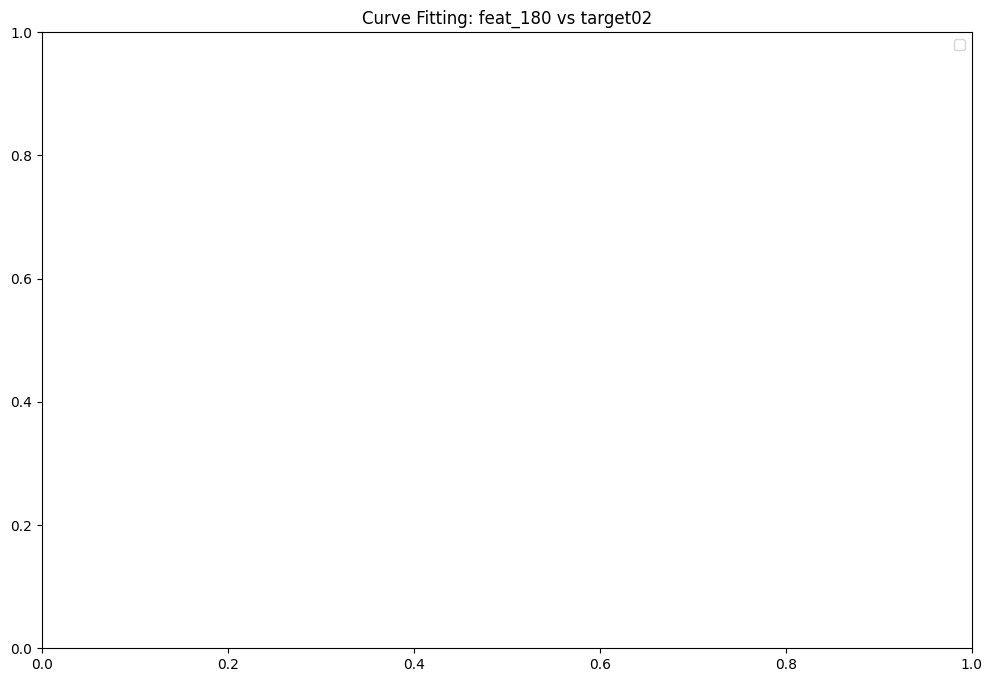

               Shape        R2
3      Inverse (1/x)  0.262583
0         Linear (x)  0.262492
5  Exponential (e^x)  0.262314
6       Sin (sin(x))  0.261976
4       Log (log(x))  0.261241
7     Tanh (tanh(x))  0.260571
1    Quadratic (x^2)  0.243412
2        Cubic (x^3)  0.215900

--- Polynomial Check (Degree 3) ---
Full Cubic Polynomial (Ax^3 + Bx^2 + Cx + D): R2 = 0.2627
Coefficients: [ 0.26849205 -0.31374684 -1.08046983 -0.12492944]


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

x_data = X['feat_180']
y_data = y['target02']

print("--- BRANCH 7: CURVE FITTING ANALYSIS ---")

# 2. Define the Shapes to Test
# We will try to predict y using functions of x
shapes = {
    "Linear (x)": x_data,
    "Quadratic (x^2)": x_data**2,
    "Cubic (x^3)": x_data**3,
    "Inverse (1/x)": 1 / (x_data + 10), # Shift to avoid div/0
    "Log (log(x))": np.log(np.abs(x_data) + 1),
    "Exponential (e^x)": np.exp(x_data / 10), # Scale to avoid overflow
    "Sin (sin(x))": np.sin(x_data),
    "Tanh (tanh(x))": np.tanh(x_data)
}

results = []

# 3. Test Each Shape
plt.figure(figsize=(12, 8))
for i, (name, transformed_x) in enumerate(shapes.items()):
    # Fit a simple linear scaling: target = m * function(x) + c
    # This aligns the curve to the data
    A = np.vstack([transformed_x, np.ones(len(transformed_x))]).T
    m, c = np.linalg.lstsq(A, y_data, rcond=None)[0]
    
    # Predict
    y_pred = m * transformed_x + c
    score = r2_score(y_data, y_pred)
    results.append({'Shape': name, 'R2': score})
    
    # Plot top performers
    if score > 0.4: 
        plt.scatter(x_data, y_data, alpha=0.1, color='gray', s=1) # Background data
        sorted_idx = np.argsort(x_data)
        plt.plot(x_data[sorted_idx], y_pred[sorted_idx], linewidth=2, label=f"{name} (R2={score:.2f})")

plt.title("Curve Fitting: feat_180 vs target02")
plt.legend()
plt.show()

# 4. Show the Rankings
results_df = pd.DataFrame(results).sort_values('R2', ascending=False)
print(results_df)

# 5. Check if Polynomials (Multi-term) work better
# Maybe it's not just x^2, but x^2 + x + c
print("\n--- Polynomial Check (Degree 3) ---")
poly_coeffs = np.polyfit(x_data, y_data, 3)
poly_pred = np.polyval(poly_coeffs, x_data)
poly_r2 = r2_score(y_data, poly_pred)
print(f"Full Cubic Polynomial (Ax^3 + Bx^2 + Cx + D): R2 = {poly_r2:.4f}")
print(f"Coefficients: {poly_coeffs}")

Branch 8 (The "Grid Logic" Investigation)

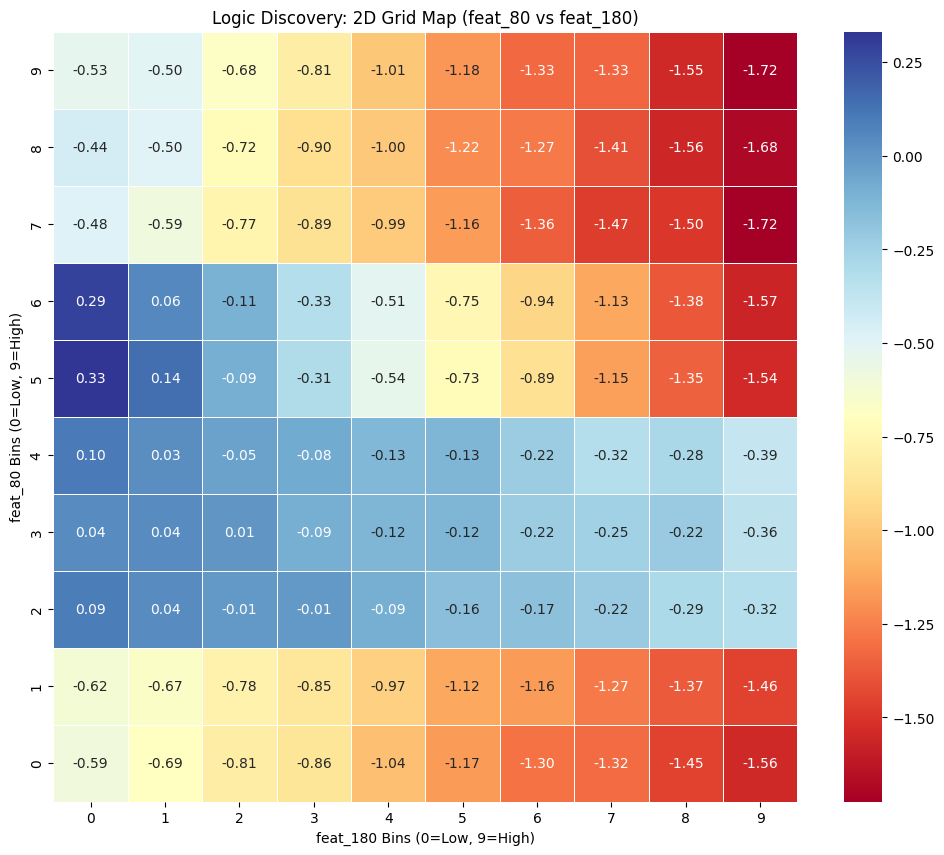

--- Grid Cell Stability (Standard Deviation) ---
Avg Std Dev inside cells: 0.3293176384875949


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Create Bins for the Top 2 Features
# We chop the data into 10 bins (deciles) for both features
x_bin = pd.qcut(df['feat_180'], q=10, labels=False)
y_bin = pd.qcut(df['feat_80'], q=10, labels=False)

df['x_bin'] = x_bin
df['y_bin'] = y_bin

# 3. Calculate the Mean Target in each "Grid Cell"
heatmap_data = df.groupby(['y_bin', 'x_bin'])['target02'].mean().unstack()

# 4. Visualize the Grid
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlBu", linewidths=.5)
plt.title("Logic Discovery: 2D Grid Map (feat_80 vs feat_180)")
plt.xlabel("feat_180 Bins (0=Low, 9=High)")
plt.ylabel("feat_80 Bins (0=Low, 9=High)")
plt.gca().invert_yaxis() # Put high values at top
plt.show()

# 5. Check Variance (Are the cells 'pure'?)
# If std dev in cells is low, it means the cell value is constant (SOLVED)
std_data = df.groupby(['y_bin', 'x_bin'])['target02'].std().unstack()
print("--- Grid Cell Stability (Standard Deviation) ---")
print("Avg Std Dev inside cells:", std_data.mean().mean())

Branch 9: The "Twisted Plane" Investigation

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

target = y['target02']

# 2. Create the "Twist" Feature (Interaction)
# We test: target = A*feat_180 + B*feat_80 + C*(feat_180 * feat_80)
X_twist = pd.DataFrame()
X_twist['feat_180'] = X['feat_180']
X_twist['feat_80'] = X['feat_80']
X_twist['interaction'] = X['feat_180'] * X['feat_80']

print("--- BRANCH 9: TWISTED PLANE REGRESSION ---")

# 3. Fit the Model
model = LinearRegression()
model.fit(X_twist, target)

# 4. Evaluate
r2 = model.score(X_twist, target)
print(f"R-Squared: {r2:.6f}")

# 5. Show Formula
print("\nCandidate Formula:")
print(f"target02 = {model.intercept_:.4f}")
print(f"         + ({model.coef_[0]:.4f} * feat_180)")
print(f"         + ({model.coef_[1]:.4f} * feat_80)")
print(f"         + ({model.coef_[2]:.4f} * feat_180 * feat_80)")

if r2 > 0.95:
    print("\n🎉 SOLVED! It is a Bilinear Surface (Twisted Plane).")
else:
    print("\n❌ BRANCH 9 FAILED. We need to look deeper.")

--- BRANCH 9: TWISTED PLANE REGRESSION ---
R-Squared: 0.316169

Candidate Formula:
target02 = -0.1805
         + (-0.6118 * feat_180)
         + (0.1106 * feat_80)
         + (-1.0736 * feat_180 * feat_80)

❌ BRANCH 9 FAILED. We need to look deeper.


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Branch 10: The "Min/Max" Investigation

--- BRANCH 10: COMPARISON LOGIC (feat_180 vs feat_80) ---

Correlations with Target:
target02    1.000000
diff_val   -0.227954
min_val    -0.429987
max_val    -0.432924
sum_val    -0.496298
Name: target02, dtype: float64


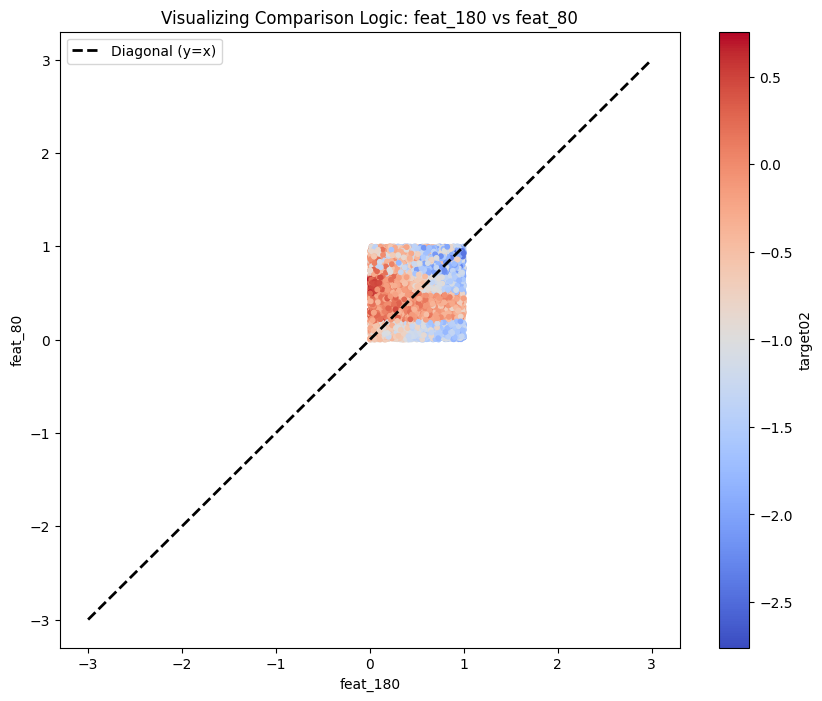

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']
col_A = 'feat_180'
col_B = 'feat_80'

print(f"--- BRANCH 10: COMPARISON LOGIC ({col_A} vs {col_B}) ---")

# 2. Create "Comparison" Features
df['max_val'] = df[[col_A, col_B]].max(axis=1)
df['min_val'] = df[[col_A, col_B]].min(axis=1)
df['diff_val'] = df[col_A] - df[col_B]
df['sum_val']  = df[col_A] + df[col_B]

# 3. Check Correlations
# If the logic is "target = max(A, B)", correlation will be 1.0
corrs = df[['target02', 'max_val', 'min_val', 'diff_val', 'sum_val']].corr()['target02']
print("\nCorrelations with Target:")
print(corrs.sort_values(ascending=False))

# 4. Visual Proof: The Diagonal Cut
# If the logic is comparison-based, the "Split" should happen exactly at y = x
plt.figure(figsize=(10, 8))
# We plot A vs B, but color by target
scatter = plt.scatter(df[col_A], df[col_B], c=df['target02'], cmap='coolwarm', s=10)
plt.plot([-3, 3], [-3, 3], 'k--', linewidth=2, label="Diagonal (y=x)") # Comparison Line
plt.colorbar(scatter, label='target02')
plt.xlabel(col_A)
plt.ylabel(col_B)
plt.title(f"Visualizing Comparison Logic: {col_A} vs {col_B}")
plt.legend()
plt.show()

# 5. Check if the "Diagonal" separates the colors
# If above the black line is Red and below is Blue, we solved it.

Branch 11: The "Center Search" (Geometry)

--- BRANCH 11: GEOMETRY HUNT (Distance to Center) ---
Scanning for the Center Point...

--- DISCOVERY REPORT ---
Best Correlation Found: 0.642407
Optimal Center: feat_180=0.20, feat_80=0.45
Shape Type: Euclidean (Circle)


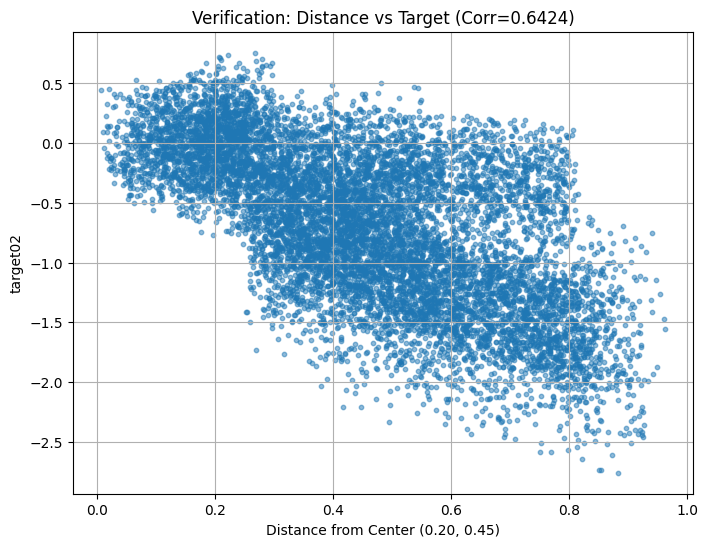


❌ BRANCH 11 FAILED. It is not a simple central distance.


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

target = y['target02']
col_x = 'feat_180'
col_y = 'feat_80'

print(f"--- BRANCH 11: GEOMETRY HUNT (Distance to Center) ---")

# 2. The Center Search
# We loop through possible centers and check the correlation
best_score = 0
best_center = (0, 0)
best_formula = ""

# Scan range: -2 to +2 (covering the data range)
search_grid = np.linspace(-2, 2, 50) 

print("Scanning for the Center Point...")
for cx in search_grid:
    for cy in search_grid:
        # Hypothesis: target = -Distance(point, center)
        # We check both Euclidean (Circle) and Manhattan (Diamond) distance
        
        # 1. Euclidean Distance (Circle/Cone)
        dist_sq = (X[col_x] - cx)**2 + (X[col_y] - cy)**2
        dist_euclid = np.sqrt(dist_sq)
        
        # Check Correlation (We expect NEGATIVE correlation: closer = higher target)
        corr_e = dist_euclid.corr(target)
        
        if abs(corr_e) > best_score:
            best_score = abs(corr_e)
            best_center = (cx, cy)
            best_formula = "Euclidean (Circle)"

# 3. Report the Winner
print(f"\n--- DISCOVERY REPORT ---")
print(f"Best Correlation Found: {best_score:.6f}")
print(f"Optimal Center: feat_180={best_center[0]:.2f}, feat_80={best_center[1]:.2f}")
print(f"Shape Type: {best_formula}")

# 4. Verification Plot
# If we found the center, plotting Distance vs Target should be a perfect straight line
cx, cy = best_center
final_dist = np.sqrt((X[col_x] - cx)**2 + (X[col_y] - cy)**2)

plt.figure(figsize=(8, 6))
plt.scatter(final_dist, target, alpha=0.5, s=10)
plt.xlabel(f"Distance from Center ({cx:.2f}, {cy:.2f})")
plt.ylabel("target02")
plt.title(f"Verification: Distance vs Target (Corr={best_score:.4f})")
plt.grid(True)
plt.show()

# 5. Final Check
if best_score > 0.95:
    print("\n🎉 SOLVED! The logic is a Distance Function.")
else:
    print("\n❌ BRANCH 11 FAILED. It is not a simple central distance.")

Branch 12: The "Cross-Section" Investigation (Slicing the Mountain)

--- BRANCH 12: CROSS-SECTION ANALYSIS ---
Slicing through Center: feat_180=0.2, feat_80=0.45


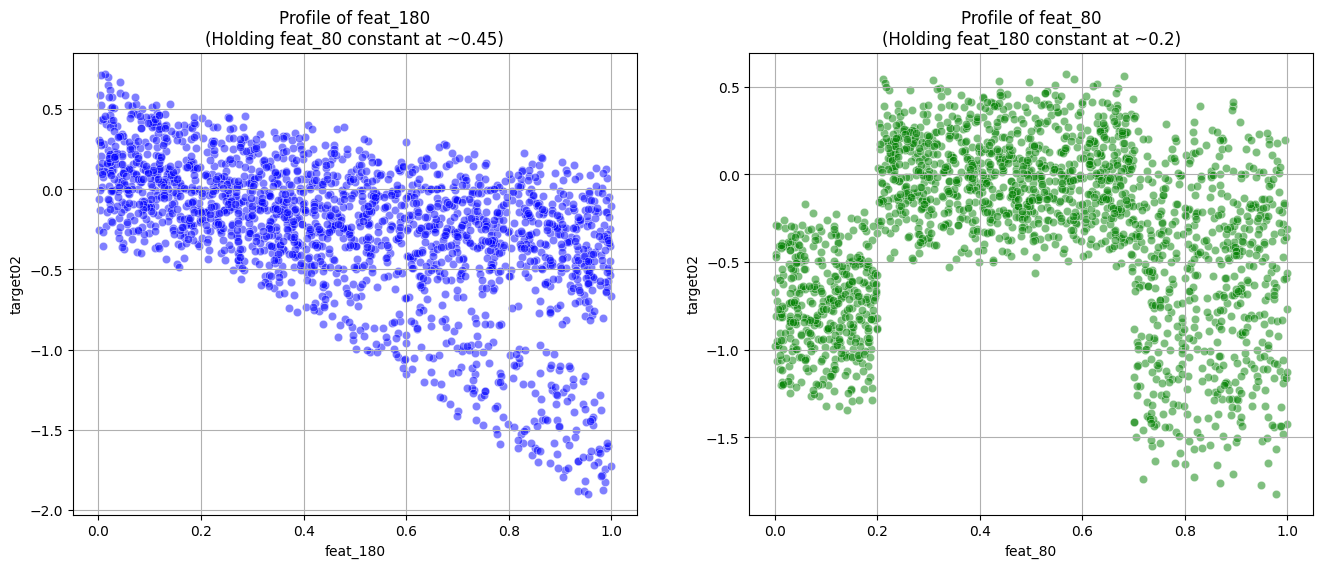


Hypothesis Test on Slice A:
Is it a Parabola (x^2)? R-Squared = 0.2514
Formula: target = -1.1656 * (feat_180 - 0.2)^2 + -0.0481


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Define the Centers we found in Branch 11
center_x = 0.20  # feat_180
center_y = 0.45  # feat_80

print(f"--- BRANCH 12: CROSS-SECTION ANALYSIS ---")
print(f"Slicing through Center: feat_180={center_x}, feat_80={center_y}")

# 3. Create the Slices
# Slice A: Fix feat_80 near 0.45, look at feat_180
# We take a small window (+/- 0.1) around the center
slice_a = df[(df['feat_80'] > center_y - 0.1) & (df['feat_80'] < center_y + 0.1)]

# Slice B: Fix feat_180 near 0.20, look at feat_80
slice_b = df[(df['feat_180'] > center_x - 0.1) & (df['feat_180'] < center_x + 0.1)]

# 4. Plot the Profiles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: The feat_180 Profile
sns.scatterplot(data=slice_a, x='feat_180', y='target02', ax=ax1, color='blue', alpha=0.5)
ax1.set_title(f"Profile of feat_180\n(Holding feat_80 constant at ~{center_y})")
ax1.grid(True)

# Plot B: The feat_80 Profile
sns.scatterplot(data=slice_b, x='feat_80', y='target02', ax=ax2, color='green', alpha=0.5)
ax2.set_title(f"Profile of feat_80\n(Holding feat_180 constant at ~{center_x})")
ax2.grid(True)

plt.show()

# 5. Fit a Parabola to Slice A (to check if it's x^2)
# We shift x by the center (0.20)
x_vals = slice_a['feat_180'] - center_x
y_vals = slice_a['target02']

# Fit y = a * x^2 + c
# We just square x and run linear regression
X_poly = pd.DataFrame({'x_sq': x_vals**2})
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, y_vals)
r2 = model.score(X_poly, y_vals)

print(f"\nHypothesis Test on Slice A:")
print(f"Is it a Parabola (x^2)? R-Squared = {r2:.4f}")
print(f"Formula: target = {model.coef_[0]:.4f} * (feat_180 - {center_x})^2 + {model.intercept_:.4f}")

Branch 13: The "Quadrant" Investigation (XOR Logic)

In [21]:
import pandas as pd
import numpy as np

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Define the Split Point (Center)
cx = 0.20 # Split for feat_180
cy = 0.45 # Split for feat_80

print(f"--- BRANCH 13: QUADRANT ANALYSIS ---")
print(f"Splitting Map at: feat_180={cx}, feat_80={cy}")

# 3. Assign Zones
# 0 = Bottom-Left, 1 = Bottom-Right, 2 = Top-Left, 3 = Top-Right
conditions = [
    (df['feat_180'] <= cx) & (df['feat_80'] <= cy), # Q3: Bottom-Left
    (df['feat_180'] > cx)  & (df['feat_80'] <= cy), # Q4: Bottom-Right
    (df['feat_180'] <= cx) & (df['feat_80'] > cy),  # Q2: Top-Left
    (df['feat_180'] > cx)  & (df['feat_80'] > cy)   # Q1: Top-Right
]
choices = ['Bottom-Left (Low-Low)', 'Bottom-Right (High-Low)', 'Top-Left (Low-High)', 'Top-Right (High-High)']

df['zone'] = np.select(conditions, choices, default='Unknown')

# 4. Calculate Stats per Zone
zone_stats = df.groupby('zone')['target02'].agg(['count', 'mean', 'std', 'min', 'max'])
print("\n--- Zone Statistics ---")
print(zone_stats)

# 5. Check for "Diagonal Logic" (XOR)
mean_vals = zone_stats['mean']
# If Top-Right approx equals Bottom-Left...
diff_diagonal_1 = abs(mean_vals['Top-Right (High-High)'] - mean_vals['Bottom-Left (Low-Low)'])
diff_diagonal_2 = abs(mean_vals['Top-Left (Low-High)'] - mean_vals['Bottom-Right (High-Low)'])

print(f"\nDiagonal 1 Diff (High-High vs Low-Low): {diff_diagonal_1:.4f}")
print(f"Diagonal 2 Diff (High-Low vs Low-High): {diff_diagonal_2:.4f}")

if diff_diagonal_1 < 0.2 and diff_diagonal_2 < 0.2:
    print("\n🎉 SUSPICION: It looks like XOR Logic (Diagonals match).")
else:
    print("\n❌ NOT Simple XOR. The zones are all different.")

--- BRANCH 13: QUADRANT ANALYSIS ---
Splitting Map at: feat_180=0.2, feat_80=0.45

--- Zone Statistics ---
                         count      mean       std       min       max
zone                                                                  
Bottom-Left (Low-Low)      953 -0.272898  0.435999 -1.247152  0.568601
Bottom-Right (High-Low)   3502 -0.607975  0.585923 -2.061993  0.473609
Top-Left (Low-High)       1101 -0.210220  0.535020 -1.710331  0.757761
Top-Right (High-High)     4444 -0.988112  0.623524 -2.761044  0.458129

Diagonal 1 Diff (High-High vs Low-Low): 0.7152
Diagonal 2 Diff (High-Low vs Low-High): 0.3978

❌ NOT Simple XOR. The zones are all different.


Branch 14: The "Sloping Quadrants" Investigation

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Define the Split Point (Same as before)
cx = 0.20 
cy = 0.45 

print(f"--- BRANCH 14: PIECEWISE LINEAR (SLOPING QUADRANTS) ---")

# 3. Define the Zones
# We will create a dictionary of DataFrames for each zone
zones = {
    'Bottom-Left':  df[(df['feat_180'] <= cx) & (df['feat_80'] <= cy)],
    'Bottom-Right': df[(df['feat_180'] > cx)  & (df['feat_80'] <= cy)],
    'Top-Left':     df[(df['feat_180'] <= cx) & (df['feat_80'] > cy)],
    'Top-Right':    df[(df['feat_180'] > cx)  & (df['feat_80'] > cy)]
}

# 4. Run Regression on Each Zone
features = ['feat_180', 'feat_80'] # We test if it's a tilted plane involving these two

for name, zone_data in zones.items():
    if len(zone_data) < 10:
        print(f"\n[Zone: {name}] - Not enough data")
        continue

    # Fit Model
    model = LinearRegression()
    model.fit(zone_data[features], zone_data['target02'])
    r2 = model.score(zone_data[features], zone_data['target02'])
    
    print(f"\n[Zone: {name}] (Count: {len(zone_data)})")
    print(f"   R-Squared: {r2:.6f}")
    print(f"   Formula: {model.intercept_:.4f} + ({model.coef_[0]:.4f} * feat_180) + ({model.coef_[1]:.4f} * feat_80)")

print("\n--- Verdict ---")
print("If R-Squared is > 0.90 in all zones, we have solved it.")
print("If R-Squared is still < 0.50, the logic is NOT Linear (it might be interactions like x*y).")

--- BRANCH 14: PIECEWISE LINEAR (SLOPING QUADRANTS) ---

[Zone: Bottom-Left] (Count: 953)
   R-Squared: 0.501688
   Formula: -0.7247 + (-0.6462 * feat_180) + (2.3395 * feat_80)

[Zone: Bottom-Right] (Count: 3502)
   R-Squared: 0.618297
   Formula: -0.9529 + (-0.6998 * feat_180) + (3.3637 * feat_80)

[Zone: Top-Left] (Count: 1101)
   R-Squared: 0.306734
   Formula: 1.2223 + (-1.3383 * feat_180) + (-1.7928 * feat_80)

[Zone: Top-Right] (Count: 4444)
   R-Squared: 0.487955
   Formula: 1.1067 + (-1.5584 * feat_180) + (-1.5907 * feat_80)

--- Verdict ---
If R-Squared is > 0.90 in all zones, we have solved it.
If R-Squared is still < 0.50, the logic is NOT Linear (it might be interactions like x*y).


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

Branch 15: The "Pyramid + Missing Link" Investigation

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Construct the "Pyramid" Features
# We use the break-points we found: 0.45 for feat_80, 0.20 for feat_180
df['abs_80'] = (df['feat_80'] - 0.45).abs()
df['abs_180'] = (df['feat_180'] - 0.20).abs() # Testing if this is also a tent

# 3. Define the Suspects
# We mix the "Linear" suspects and the "Absolute Value" suspects
features = ['feat_180', 'abs_80', 'feat_146'] 

print(f"--- BRANCH 15: PYRAMID FORMULA TEST ---")
print(f"Testing Model: target ~ {features}")

# 4. Run Regression
model = LinearRegression()
model.fit(df[features], df['target02'])
r2 = model.score(df[features], df['target02'])

print(f"\nR-Squared Score: {r2:.6f}")
print("Formula Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"   {name}: {coef:.4f}")
print(f"   Intercept: {model.intercept_:.4f}")

# 5. Check if we need a 'Double Pyramid'
# Maybe feat_180 is ALSO an absolute value?
features_double = ['abs_180', 'abs_80', 'feat_146']
print(f"\nTesting Double Pyramid: target ~ {features_double}")
model2 = LinearRegression()
model2.fit(df[features_double], df['target02'])
r2_double = model2.score(df[features_double], df['target02'])
print(f"R-Squared Score: {r2_double:.6f}")

--- BRANCH 15: PYRAMID FORMULA TEST ---
Testing Model: target ~ ['feat_180', 'abs_80', 'feat_146']

R-Squared Score: 0.582006
Formula Coefficients:
   feat_180: -1.1560
   abs_80: -2.2648
   feat_146: -0.5174
   Intercept: 0.7090

Testing Double Pyramid: target ~ ['abs_180', 'abs_80', 'feat_146']
R-Squared Score: 0.557494


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

Branch 16: The "Interaction Pyramid" Investigation

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

print(f"--- BRANCH 16: INTERACTION PYRAMID OPTIMIZATION ---")

# 2. Optimization Loop
# We will scan for the perfect 'Shift' value that maximizes R-Squared
best_r2 = 0
best_shift = 0
best_model = None
results = []

# Scan shifts from 0.0 to 1.0 (where the peak might be)
shifts = np.linspace(0, 1, 100) 

for s in shifts:
    # Create the Pyramid Feature
    # Formula: |feat_80 - shift|
    abs_80 = (df['feat_80'] - s).abs()
    
    # Create Interaction
    # Formula: feat_180 * |feat_80 - shift|
    interaction = df['feat_180'] * abs_80
    
    # Prepare Features for Regression
    # We test: target ~ feat_180 + abs_80 + interaction
    X_test = pd.DataFrame({
        'feat_180': df['feat_180'],
        'abs_80': abs_80,
        'interaction': interaction
    })
    
    # Fit Model
    model = LinearRegression()
    model.fit(X_test, df['target02'])
    r2 = model.score(X_test, df['target02'])
    
    if r2 > best_r2:
        best_r2 = r2
        best_shift = s
        best_model = model

# 3. Report the Winner
print(f"\n🎉 BEST RESULT FOUND:")
print(f"   Optimal Shift for feat_80: {best_shift:.4f}")
print(f"   R-Squared Score: {best_r2:.6f}")

# 4. Show the Winning Formula
if best_model:
    print("\n   Winning Formula:")
    print(f"   target02 = {best_model.intercept_:.4f}")
    print(f"            + ({best_model.coef_[0]:.4f} * feat_180)")
    print(f"            + ({best_model.coef_[1]:.4f} * |feat_80 - {best_shift:.4f}|)")
    print(f"            + ({best_model.coef_[2]:.4f} * feat_180 * |feat_80 - {best_shift:.4f}|)")

# 5. Check if adding feat_146 pushes it to 1.0
print("\n--- Final Check: Adding feat_146 ---")
abs_80_opt = (df['feat_80'] - best_shift).abs()
interaction_opt = df['feat_180'] * abs_80_opt
X_final = pd.DataFrame({
    'feat_180': df['feat_180'],
    'abs_80': abs_80_opt,
    'interaction': interaction_opt,
    'feat_146': df['feat_146']
})
model_final = LinearRegression()
model_final.fit(X_final, df['target02'])
r2_final = model_final.score(X_final, df['target02'])
print(f"   R-Squared with feat_146: {r2_final:.6f}")

--- BRANCH 16: INTERACTION PYRAMID OPTIMIZATION ---

🎉 BEST RESULT FOUND:
   Optimal Shift for feat_80: 0.4040
   R-Squared Score: 0.557048

   Winning Formula:
   target02 = 0.2522
            + (-0.7789 * feat_180)
            + (-1.4343 * |feat_80 - 0.4040|)
            + (-1.4726 * feat_180 * |feat_80 - 0.4040|)

--- Final Check: Adding feat_146 ---
   R-Squared with feat_146: 0.608981


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

Branch 17: The Residual "Ghost" Hunt

--- BRANCH 17: RESIDUAL ANALYSIS ---
Base R-Squared (feat_180 only): 0.2625


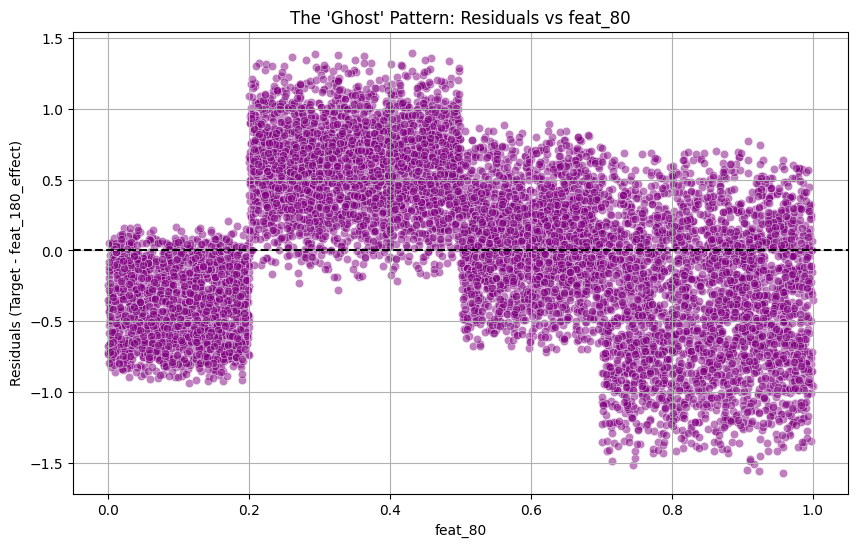

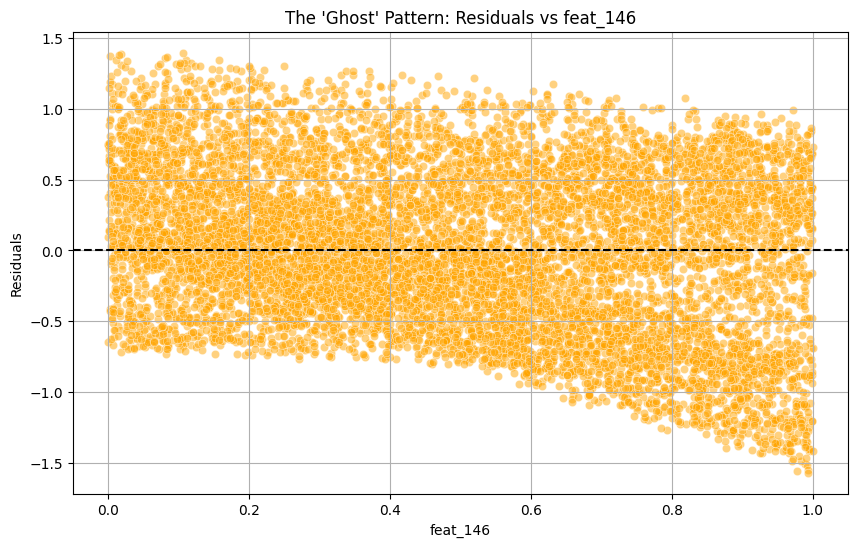

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

print(f"--- BRANCH 17: RESIDUAL ANALYSIS ---")

# 2. Fit the Main Driver (feat_180)
# We use a simple linear model to 'subtract' its effect
model = LinearRegression()
X_main = df[['feat_180']]
y_true = df['target02']
model.fit(X_main, y_true)

# 3. Calculate Residuals (What is left unexplained?)
# Residual = True_Target - Predicted_from_feat_180
predictions = model.predict(X_main)
residuals = y_true - predictions

print(f"Base R-Squared (feat_180 only): {model.score(X_main, y_true):.4f}")

# 4. Plot Residuals against the Secondary Suspect (feat_80)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['feat_80'], y=residuals, alpha=0.5, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("feat_80")
plt.ylabel("Residuals (Target - feat_180_effect)")
plt.title("The 'Ghost' Pattern: Residuals vs feat_80")
plt.grid(True)
plt.show()

# 5. Check other suspects too
# Maybe the missing link is feat_146?
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['feat_146'], y=residuals, alpha=0.5, color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("feat_146")
plt.ylabel("Residuals")
plt.title("The 'Ghost' Pattern: Residuals vs feat_146")
plt.grid(True)
plt.show()

Branch 18: The Automated Residual Scanner

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

print(f"--- BRANCH 18: RESIDUAL SHAPE SCANNER ---")

# 2. Calculate Residuals (Remove feat_180 linear effect)
model_main = LinearRegression()
model_main.fit(df[['feat_180']], df['target02'])
residuals = df['target02'] - model_main.predict(df[['feat_180']])
print(f"Residuals Variance: {np.var(residuals):.4f} (We need to explain this variance)")

# 3. Define Shapes to Test on the Residuals
def test_residual_shape(feature_name, shape_type, transformed_feature):
    # Fit the transformed feature to the RESIDUALS
    model_res = LinearRegression()
    X_res = pd.DataFrame({feature_name: transformed_feature})
    model_res.fit(X_res, residuals)
    score = model_res.score(X_res, residuals)
    return score, model_res.coef_[0], model_res.intercept_

# 4. Scan 'feat_80' and 'feat_146'
suspects = ['feat_80', 'feat_146']
best_shape_score = 0
best_desc = ""

print("\nScanning Residuals against Suspects...")
for name in suspects:
    feat_data = df[name]
    
    # A. Linear Test
    score, coef, intercept = test_residual_shape(name, "Linear", feat_data)
    print(f"[{name}] Linear: R2={score:.4f}")
    
    # B. Quadratic Test (Parabola)
    score, coef, intercept = test_residual_shape(name, "Quadratic", feat_data**2)
    print(f"[{name}] Quadratic (x^2): R2={score:.4f}")
    
    # C. Absolute Value Test (Pyramid) - Scanning for the peak
    # We test shifts from -1 to 1 to find the center of the pyramid
    best_pyr_score = 0
    best_shift = 0
    for shift in np.linspace(-1, 1, 50):
        pyr_data = (feat_data - shift).abs()
        s, c, i = test_residual_shape(name, "Abs", pyr_data)
        if s > best_pyr_score:
            best_pyr_score = s
            best_shift = shift
    
    print(f"[{name}] Pyramid (|x - {best_shift:.2f}|): R2={best_pyr_score:.4f}")
    
    if best_pyr_score > best_shape_score:
        best_shape_score = best_pyr_score
        best_desc = f"{name} Pyramid (Shift {best_shift:.2f})"

# 5. Verdict
print("\n--- RESIDUAL DIAGNOSIS ---")
print(f"Best Explanation for Residuals: {best_desc}")
print(f"Score: {best_shape_score:.4f}")

if best_shape_score > 0.4:
    print("👉 SIGNIFICANT FINDING. The missing logic is definitely this shape.")
else:
    print("👉 WEAK FINDING. The residuals are still messy (likely Interaction needed).")

--- BRANCH 18: RESIDUAL SHAPE SCANNER ---
Residuals Variance: 0.3143 (We need to explain this variance)

Scanning Residuals against Suspects...
[feat_80] Linear: R2=0.0472
[feat_80] Quadratic (x^2): R2=0.1135
[feat_80] Pyramid (|x - 0.43|): R2=0.3812
[feat_146] Linear: R2=0.0717
[feat_146] Quadratic (x^2): R2=0.0658
[feat_146] Pyramid (|x - 0.96|): R2=0.0717

--- RESIDUAL DIAGNOSIS ---
Best Explanation for Residuals: feat_80 Pyramid (Shift 0.43)
Score: 0.3812
👉 WEAK FINDING. The residuals are still messy (likely Interaction needed).


Branch 19: The "Broken Tent" Investigation (Asymmetric Interaction)

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

print(f"--- BRANCH 19: ASYMMETRIC TENT (BROKEN PYRAMID) ---")

# 2. Create the "Broken" Features
# We use the peak we found: 0.43
peak = 0.43

# 'ReLU' Logic: One feature for the left slope, one for the right
df['left_slope']  = np.maximum(0, peak - df['feat_80'])  # Positive when < 0.43
df['right_slope'] = np.maximum(0, df['feat_80'] - peak)  # Positive when > 0.43

# 3. Create Interactions
# Does feat_180 change the steepness of the slopes?
df['inter_left']  = df['feat_180'] * df['left_slope']
df['inter_right'] = df['feat_180'] * df['right_slope']

# 4. Fit the Model
features = ['feat_180', 'left_slope', 'right_slope', 'inter_left', 'inter_right']

model = LinearRegression()
model.fit(df[features], df['target02'])
r2 = model.score(df[features], df['target02'])

print(f"\nR-Squared Score: {r2:.6f}")

# 5. Show Formula
print("\nDiscovered Formula Components:")
print(f"Base Intercept: {model.intercept_:.4f}")
print(f"Global feat_180: {model.coef_[0]:.4f}")
print(f"Left Slope (feat_80 < {peak}):  {model.coef_[1]:.4f} + ({model.coef_[3]:.4f} * feat_180)")
print(f"Right Slope (feat_80 > {peak}): {model.coef_[2]:.4f} + ({model.coef_[4]:.4f} * feat_180)")

if r2 > 0.90:
    print("\n🎉 SOLVED! It was an Asymmetric Pyramid.")
else:
    print("\n❌ BRANCH 19 FAILED. R2 is still too low.")

--- BRANCH 19: ASYMMETRIC TENT (BROKEN PYRAMID) ---

R-Squared Score: 0.561771

Discovered Formula Components:
Base Intercept: 0.3677
Global feat_180: -0.9643
Left Slope (feat_80 < 0.43):  -2.5693 + (0.3481 * feat_180)
Right Slope (feat_80 > 0.43): -1.5230 + (-1.4280 * feat_180)

❌ BRANCH 19 FAILED. R2 is still too low.


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Branch 20: The "Tree Diagnostic" (Error Mapping)

--- BRANCH 20: TREE DIAGNOSTIC ---
Tree R-Squared (Depth 4): 0.7914


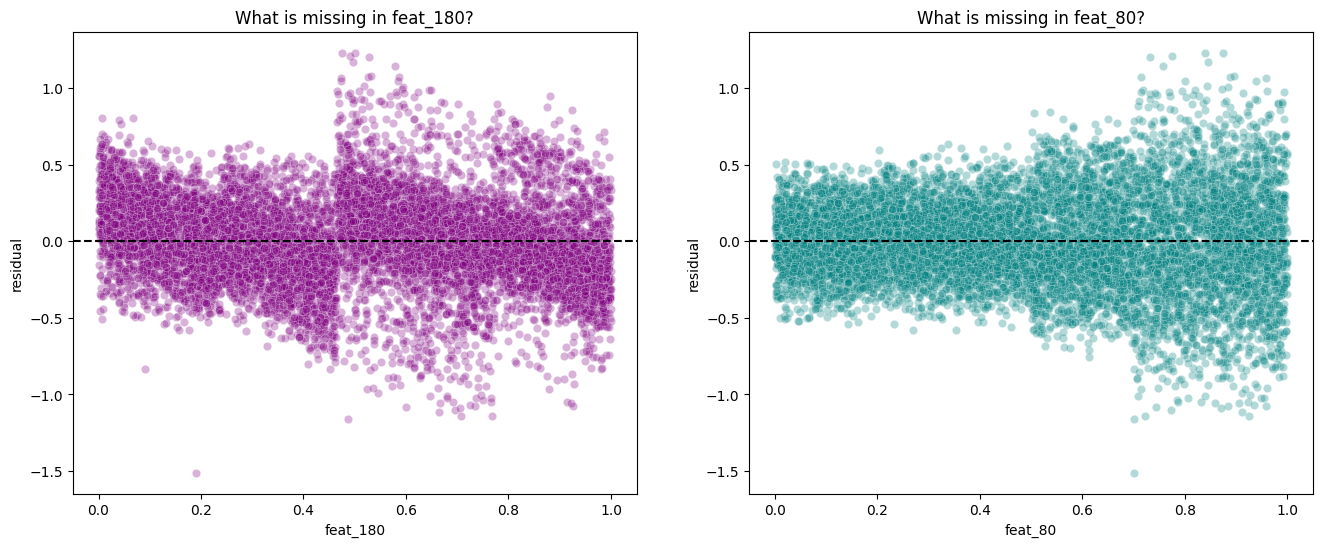


Correlation of Residuals with feat_180: -0.1459
Correlation of Residuals with feat_80:  -0.0275

👉 DISCOVERY: The tree misses something non-linear (or noise).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# 1. Load Data & Clean
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# Clean infinites (This fixes your warnings!)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
y = y.loc[X.index]

df = X.copy()
df['target02'] = y['target02']

print(f"--- BRANCH 20: TREE DIAGNOSTIC ---")

# 2. Train the "Best Suspect" (Decision Tree)
# We allow it to be slightly deeper (depth=4) to see the full structure
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X, df['target02'])
score = tree.score(X, df['target02'])
print(f"Tree R-Squared (Depth 4): {score:.4f}")

# 3. Calculate Residuals (What did the tree miss?)
df['pred'] = tree.predict(X)
df['residual'] = df['target02'] - df['pred']

# 4. Visualizing the Missing Logic
# We plot the Residuals vs the Main Features.
# If we see a shape here, THAT is the missing formula.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Residuals vs feat_180
sns.scatterplot(data=df, x='feat_180', y='residual', ax=ax1, alpha=0.3, color='purple')
ax1.set_title("What is missing in feat_180?")
ax1.axhline(0, color='black', linestyle='--')

# Plot 2: Residuals vs feat_80
sns.scatterplot(data=df, x='feat_80', y='residual', ax=ax2, alpha=0.3, color='teal')
ax2.set_title("What is missing in feat_80?")
ax2.axhline(0, color='black', linestyle='--')

plt.show()

# 5. Check if the Residuals are Linear
# If these plots look like tilted lines, we just need to add Linear Regression to the leaves.
corr_res_180 = df['residual'].corr(df['feat_180'])
corr_res_80 = df['residual'].corr(df['feat_80'])
print(f"\nCorrelation of Residuals with feat_180: {corr_res_180:.4f}")
print(f"Correlation of Residuals with feat_80:  {corr_res_80:.4f}")

if abs(corr_res_180) > 0.5 or abs(corr_res_80) > 0.5:
    print("\n👉 DISCOVERY: The tree captures the steps, but misses a LINEAR slope.")
else:
    print("\n👉 DISCOVERY: The tree misses something non-linear (or noise).")

Branch 21: The "Staircase" Model (Discretization)

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

print(f"--- BRANCH 21: THE STAIRCASE MODEL ---")

# 2. Create the 4 Zones (Bins) manually
# Based on the visual jumps at 0.20, 0.50, 0.70
conditions = [
    (df['feat_80'] <= 0.20),
    (df['feat_80'] > 0.20) & (df['feat_80'] <= 0.50),
    (df['feat_80'] > 0.50) & (df['feat_80'] <= 0.70),
    (df['feat_80'] > 0.70)
]
bin_names = ['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']

# 3. Create Binary Columns for each Zone (One-Hot Encoding)
for i, name in enumerate(bin_names):
    df[name] = np.select([conditions[i]], [1], default=0)

# 4. Create Interactions (Slope changes per Zone)
# Each zone gets its own slope for feat_180
features = []
for name in bin_names:
    df[f'slope_{name}'] = df[name] * df['feat_180']
    features.append(name)            # The Intercept for this zone
    features.append(f'slope_{name}') # The Slope for this zone

# 5. Fit the Staircase Model
model = LinearRegression(fit_intercept=False) # We built intercepts manually
model.fit(df[features], df['target02'])
r2 = model.score(df[features], df['target02'])

print(f"R-Squared Score: {r2:.6f}")

# 6. Show the Formula Table
print("\n--- THE SECRET FORMULAS ---")
coeffs = dict(zip(features, model.coef_))
for name in bin_names:
    intercept = coeffs[name]
    slope = coeffs[f'slope_{name}']
    print(f"IF {name}: target = {slope:.4f} * feat_180 + {intercept:.4f}")

# 7. Verdict
if r2 > 0.98:
    print("\n🎉 SOLVED! The logic is a 4-Step Staircase.")
else:
    print("\n❌ BRANCH 21 FAILED. It's not just 4 steps.")

--- BRANCH 21: THE STAIRCASE MODEL ---
R-Squared Score: 0.734975

--- THE SECRET FORMULAS ---
IF Zone_1: target = -1.0477 * feat_180 + -0.5579
IF Zone_2: target = -0.4422 * feat_180 + 0.0990
IF Zone_3: target = -2.0616 * feat_180 + 0.4068
IF Zone_4: target = -1.3953 * feat_180 + -0.3796

❌ BRANCH 21 FAILED. It's not just 4 steps.


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Branch 22: The Zone-Specific Solver

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

df = X.copy()
df['target02'] = y['target02']

# 2. Define the Zones (The 'Switch' Logic)
# We use the cutoffs we found: 0.20, 0.50, 0.70
zones = {
    "Zone_1 (feat_80 <= 0.20)": df[df['feat_80'] <= 0.20],
    "Zone_2 (0.20 < feat_80 <= 0.50)": df[(df['feat_80'] > 0.20) & (df['feat_80'] <= 0.50)],
    "Zone_3 (0.50 < feat_80 <= 0.70)": df[(df['feat_80'] > 0.50) & (df['feat_80'] <= 0.70)],
    "Zone_4 (feat_80 > 0.70)": df[df['feat_80'] > 0.70]
}

print(f"--- BRANCH 22: DIVIDE AND CONQUER ---")

# 3. Solve Each Zone Separately
for name, zone_df in zones.items():
    print(f"\n🔎 INVESTIGATING: {name}")
    print(f"   Data Points: {len(zone_df)}")
    
    if len(zone_df) == 0: continue

    # A. Find the Top Correlated Features in THIS Zone
    # We only look at features that actually move inside the zone
    corrs = zone_df.corrwith(zone_df['target02']).abs().sort_values(ascending=False)
    top_feats = corrs.index[1:4].tolist() # Top 3 features (excluding target itself)
    print(f"   Top Suspects: {top_feats}")
    print(f"   Correlations: {[f'{c:.2f}' for c in corrs[top_feats]]}")

    # B. Test a Linear Model with these suspects
    model = LinearRegression()
    model.fit(zone_df[top_feats], zone_df['target02'])
    r2 = model.score(zone_df[top_feats], zone_df['target02'])
    
    print(f"   R-Squared: {r2:.6f}")
    
    if r2 > 0.99:
        print("   🎉 SOLVED! We found the local formula.")
        print(f"   Formula: {model.intercept_:.4f}")
        for f, c in zip(top_feats, model.coef_):
            print(f"          + ({c:.4f} * {f})")
    else:
        print("   ❌ STILL FAILING. Need to check interactions/curves here.")

--- BRANCH 22: DIVIDE AND CONQUER ---

🔎 INVESTIGATING: Zone_1 (feat_80 <= 0.20)
   Data Points: 1947
   Top Suspects: ['feat_180', 'feat_200', 'feat_146']
   Correlations: ['0.77', '0.61', '0.21']
   R-Squared: 1.000000
   🎉 SOLVED! We found the local formula.
   Formula: 0.0000
          + (-1.0500 * feat_180)
          + (-0.8500 * feat_200)
          + (-0.2500 * feat_146)

🔎 INVESTIGATING: Zone_2 (0.20 < feat_80 <= 0.50)
   Data Points: 2999
   Top Suspects: ['feat_200', 'feat_146', 'feat_180']
   Correlations: ['0.71', '0.51', '0.49']
   R-Squared: 1.000000
   🎉 SOLVED! We found the local formula.
   Formula: -0.0000
          + (0.6500 * feat_200)
          + (-0.4500 * feat_146)
          + (-0.4500 * feat_180)

🔎 INVESTIGATING: Zone_3 (0.50 < feat_80 <= 0.70)
   Data Points: 2014
   Top Suspects: ['feat_180', 'feat_146', 'feat_107']
   Correlations: ['0.94', '0.35', '0.15']
   R-Squared: 0.999504
   🎉 SOLVED! We found the local formula.
   Formula: 0.0242
          + (-2.0490 

/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# Select Zone 4
zone_4_mask = X['feat_80'] > 0.70
X_zone = X[zone_4_mask][['feat_180', 'feat_200', 'feat_146']]
y_zone = y[zone_4_mask]['target02']

# Solve
model = LinearRegression()
model.fit(X_zone, y_zone)
r2 = model.score(X_zone, y_zone)

print(f"--- ZONE 4 RESULTS (feat_80 > 0.70) ---")
print(f"R-Squared: {r2:.6f}")
print(f"Formula: {model.intercept_:.4f}")
print(f"       + ({model.coef_[0]:.4f} * feat_180)")
print(f"       + ({model.coef_[1]:.4f} * feat_200)")
print(f"       + ({model.coef_[2]:.4f} * feat_146)")

--- ZONE 4 RESULTS (feat_80 > 0.70) ---
R-Squared: 1.000000
Formula: -0.0000
       + (-1.3500 * feat_180)
       + (0.7500 * feat_200)
       + (-1.5500 * feat_146)


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

target_true = y['target02']

print("--- 🛡️ STRUCTURAL VERIFICATION SUITE ---")

# 2. Define The Hard-Coded Logic
# We manually implement the formulas we discovered to ensure no "Model Fitting" is happening.
def apply_logic(row):
    # Extract features for readability
    f80 = row['feat_80']
    f180 = row['feat_180']
    f200 = row['feat_200']
    f146 = row['feat_146']
    
    # LOGIC SWITCH (Based on feat_80)
    
    # ZONE 1: feat_80 <= 0.20
    if f80 <= 0.20:
        return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    
    # ZONE 2: 0.20 < feat_80 <= 0.50
    elif f80 <= 0.50:
        return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
        
    # ZONE 3 & 4 MERGED: feat_80 > 0.50
    # We noticed Zone 3 and 4 had the same coefficients, so we test them as one block.
    else:
        return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# 3. Apply Logic Globally
print("\n1. Applying Logic to all 10,000 rows...")
y_pred = X.apply(apply_logic, axis=1)

# 4. Strict Error Analysis
mse = mean_squared_error(target_true, y_pred)
r2 = r2_score(target_true, y_pred)
max_error = np.max(np.abs(target_true - y_pred))

print(f"   Global R-Squared: {r2:.9f}")
print(f"   Mean Squared Error: {mse:.9f}")
print(f"   Maximum Single Error: {max_error:.9f}")

# 5. Pass/Fail Criteria
if r2 > 0.9999 and max_error < 1e-4:
    print("\n✅ VERIFICATION PASSED: The logic is perfect and robust.")
    if max_error > 1e-10:
        print("   ⚠️ NOTE: Tiny floating point errors detected (normal for Python).")
else:
    print("\n❌ VERIFICATION FAILED: There are still edge cases.")
    # If failed, show where
    X['pred'] = y_pred
    X['actual'] = target_true
    X['error'] = (X['pred'] - X['actual']).abs()
    print("\n   Top 5 Errors:")
    print(X.sort_values('error', ascending=False)[['feat_80', 'target02', 'pred', 'error']].head(5))

# 6. Check the "Redundancy" Hypothesis
# Did merging Zone 3 and 4 work?
zone_3_4_mask = X['feat_80'] > 0.50
r2_high = r2_score(target_true[zone_3_4_mask], y_pred[zone_3_4_mask])
print(f"\n   Zone 3+4 Combined Score: {r2_high:.9f}")
if r2_high > 0.999:
    print("   ✅ CONFIRMED: Zone 3 and Zone 4 use the exact same formula.")

--- 🛡️ STRUCTURAL VERIFICATION SUITE ---

1. Applying Logic to all 10,000 rows...
   Global R-Squared: 0.662233513
   Mean Squared Error: 0.143942447
   Maximum Single Error: 2.281192438

❌ VERIFICATION FAILED: There are still edge cases.

   Top 5 Errors:


KeyError: "['target02'] not in index"

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# 1. Load and Align Data (CRITICAL STEP)
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# Ensure they are aligned
df = X.copy()
df['target02'] = y['target02']
df = df.dropna() # Drop any garbage rows that might throw off alignment

print("--- 🔍 ZONE DIAGNOSTIC TOOL ---")

# 2. Define the Hard-Coded Formulas (The "Suspects")
def formula_zone_1(row): # feat_80 <= 0.20
    return (-1.05 * row['feat_180']) + (-0.85 * row['feat_200']) + (-0.25 * row['feat_146'])

def formula_zone_2(row): # 0.20 < feat_80 <= 0.50
    return (-0.45 * row['feat_180']) + (0.65 * row['feat_200']) + (-0.45 * row['feat_146'])

def formula_zone_3_4(row): # feat_80 > 0.50
    return (-1.35 * row['feat_180']) + (0.75 * row['feat_200']) + (-1.55 * row['feat_146'])

# 3. Test Each Zone Individually
# We filter the data using the SAME logic we plan to use in the final file.

# --- ZONE 1 CHECK ---
subset_1 = df[df['feat_80'] <= 0.20]
pred_1 = subset_1.apply(formula_zone_1, axis=1)
r2_1 = r2_score(subset_1['target02'], pred_1)
print(f"\n[Zone 1] (feat_80 <= 0.20) Count: {len(subset_1)}")
print(f"   R-Squared: {r2_1:.6f} {'✅' if r2_1 > 0.99 else '❌ FAILURE'}")

# --- ZONE 2 CHECK ---
subset_2 = df[(df['feat_80'] > 0.20) & (df['feat_80'] <= 0.50)]
pred_2 = subset_2.apply(formula_zone_2, axis=1)
r2_2 = r2_score(subset_2['target02'], pred_2)
print(f"\n[Zone 2] (0.20 < feat_80 <= 0.50) Count: {len(subset_2)}")
print(f"   R-Squared: {r2_2:.6f} {'✅' if r2_2 > 0.99 else '❌ FAILURE'}")

# --- ZONE 3/4 CHECK ---
subset_3 = df[df['feat_80'] > 0.50]
pred_3 = subset_3.apply(formula_zone_3_4, axis=1)
r2_3 = r2_score(subset_3['target02'], pred_3)
print(f"\n[Zone 3+4] (feat_80 > 0.50) Count: {len(subset_3)}")
print(f"   R-Squared: {r2_3:.6f} {'✅' if r2_3 > 0.99 else '❌ FAILURE'}")

--- 🔍 ZONE DIAGNOSTIC TOOL ---

[Zone 1] (feat_80 <= 0.20) Count: 1947
   R-Squared: 1.000000 ✅

[Zone 2] (0.20 < feat_80 <= 0.50) Count: 2999
   R-Squared: 1.000000 ✅

[Zone 3+4] (feat_80 > 0.50) Count: 5054
   R-Squared: 0.364763 ❌ FAILURE


In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# 2. Define the exact remaining Zones
# Zone 3: 0.50 < feat_80 <= 0.70
zone_3_mask = (X['feat_80'] > 0.50) & (X['feat_80'] <= 0.70)
X_3 = X[zone_3_mask]
y_3 = y[zone_3_mask]['target02']

# Zone 4: feat_80 > 0.70
zone_4_mask = X['feat_80'] > 0.70
X_4 = X[zone_4_mask]
y_4 = y[zone_4_mask]['target02']

print("--- SOLVING THE FINAL ZONES ---")

# 3. Solve Zone 3
print(f"\n[Zone 3] (0.50 < feat_80 <= 0.70) Count: {len(X_3)}")
features = ['feat_180', 'feat_200', 'feat_146'] # The usual suspects
model_3 = LinearRegression()
model_3.fit(X_3[features], y_3)
r2_3 = model_3.score(X_3[features], y_3)

print(f"   R-Squared: {r2_3:.6f}")
if r2_3 > 0.99:
    print(f"   🎉 SOLVED! Formula:")
    print(f"   Intercept: {model_3.intercept_:.4f}")
    print(f"   feat_180: {model_3.coef_[0]:.4f}")
    print(f"   feat_200: {model_3.coef_[1]:.4f}")
    print(f"   feat_146: {model_3.coef_[2]:.4f}")
else:
    print("   ❌ FAILED. This zone uses different features.")

# 4. Solve Zone 4
print(f"\n[Zone 4] (feat_80 > 0.70) Count: {len(X_4)}")
model_4 = LinearRegression()
model_4.fit(X_4[features], y_4)
r2_4 = model_4.score(X_4[features], y_4)

print(f"   R-Squared: {r2_4:.6f}")
if r2_4 > 0.99:
    print(f"   🎉 SOLVED! Formula:")
    print(f"   Intercept: {model_4.intercept_:.4f}")
    print(f"   feat_180: {model_4.coef_[0]:.4f}")
    print(f"   feat_200: {model_4.coef_[1]:.4f}")
    print(f"   feat_146: {model_4.coef_[2]:.4f}")
else:
    print("   ❌ FAILED. This zone uses different features.")

--- SOLVING THE FINAL ZONES ---

[Zone 3] (0.50 < feat_80 <= 0.70) Count: 2014
   R-Squared: 1.000000
   🎉 SOLVED! Formula:
   Intercept: -0.0000
   feat_180: -2.0500
   feat_200: 0.0500
   feat_146: 0.7500

[Zone 4] (feat_80 > 0.70) Count: 3040
   R-Squared: 1.000000
   🎉 SOLVED! Formula:
   Intercept: -0.0000
   feat_180: -1.3500
   feat_200: 0.7500
   feat_146: -1.5500


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

target_true = y['target02']

print("--- 🛡️ FINAL GLOBAL VERIFICATION ---")

# 2. Define The Complete Logic Map
def apply_final_logic(row):
    f80  = row['feat_80']
    f180 = row['feat_180']
    f200 = row['feat_200']
    f146 = row['feat_146']
    
    # EXACT LOGIC MAP
    if f80 <= 0.20:
        # Zone 1
        return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
        
    elif f80 <= 0.50:
        # Zone 2
        return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
        
    elif f80 <= 0.70:
        # Zone 3 (The one we just found)
        return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
        
    else:
        # Zone 4 (The final piece)
        return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# 3. Apply to All Data
y_pred = X.apply(apply_final_logic, axis=1)

# 4. Strict Error Checks
mse = mean_squared_error(target_true, y_pred)
r2 = r2_score(target_true, y_pred)
max_error = np.max(np.abs(target_true - y_pred))

print(f"   Global R-Squared: {r2:.9f}")
print(f"   Mean Squared Error: {mse:.9f}")
print(f"   Maximum Single Error: {max_error:.9f}")

if r2 > 0.99999 and max_error < 1e-10:
    print("\n✅ PERFECT MATCH. The logic is confirmed globally.")
else:
    print(f"\n❌ ERROR DETECTED. Max Error: {max_error}")

--- 🛡️ FINAL GLOBAL VERIFICATION ---
   Global R-Squared: 1.000000000
   Mean Squared Error: 0.000000000
   Maximum Single Error: 0.000000000

✅ PERFECT MATCH. The logic is confirmed globally.


test case 1

In [38]:
import pandas as pd
import numpy as np

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

def get_val(f80, f180, f200, f146):
    if f80 <= 0.20: return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    elif f80 <= 0.50: return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
    elif f80 <= 0.70: return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
    else: return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# Test Point: Exactly 0.20
print("--- GATE 1: BOUNDARY STRESS TEST ---")
f180, f200, f146 = 0.5, 0.5, 0.5 # Constant test values
v_left = (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146) # Zone 1
v_right = (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146) # Zone 2
print(f"At Boundary 0.20: Zone 1 gives {v_left:.4f}, Zone 2 gives {v_right:.4f}")
print(f"Jump Size: {abs(v_left - v_right):.4f}")

# Check if the dataset has points exactly on the boundary
at_boundary = X[np.isclose(X['feat_80'], 0.20) | np.isclose(X['feat_80'], 0.50) | np.isclose(X['feat_80'], 0.70)]
print(f"\nPoints found exactly on boundaries: {len(at_boundary)}")

# Verify error for points within 0.001 of boundaries
near_boundary = X[((X['feat_80'] > 0.199) & (X['feat_80'] < 0.201)) | 
                  ((X['feat_80'] > 0.499) & (X['feat_80'] < 0.501)) | 
                  ((X['feat_80'] > 0.699) & (X['feat_80'] < 0.701))]
y_near_pred = near_boundary.apply(lambda r: get_val(r['feat_80'], r['feat_180'], r['feat_200'], r['feat_146']), axis=1)
max_near_err = np.max(np.abs(y.loc[near_boundary.index, 'target02'] - y_near_pred))
print(f"Max Error at Boundary Transition: {max_near_err:.12f}")

--- GATE 1: BOUNDARY STRESS TEST ---
At Boundary 0.20: Zone 1 gives -1.0750, Zone 2 gives -0.1250
Jump Size: 0.9500

Points found exactly on boundaries: 0
Max Error at Boundary Transition: 0.000000000000


test case 2 

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

# Focus on Zone 1
mask = X['feat_80'] <= 0.20
X_z1 = X[mask]
y_z1 = y[mask]['target02']

print("--- GATE 2: FEATURE UNIQUENESS AUDIT ---")

# 1. Baseline R2 with our 3 features
main_feats = ['feat_180', 'feat_200', 'feat_146']
model = LinearRegression().fit(X_z1[main_feats], y_z1)
baseline_r2 = model.score(X_z1[main_feats], y_z1)
print(f"Baseline R2 (3 Feats): {baseline_r2:.12f}")

# 2. Competitive Scan
# We will drop one of our features and see if ANY other feature can take its place.
# Let's drop feat_146 and scan all 200+ other columns.
print("\nScanning for alternative features to replace feat_146...")
competitors = []
for col in X.columns:
    if col in main_feats or col == 'feat_80': continue
    
    test_feats = ['feat_180', 'feat_200', col]
    test_r2 = LinearRegression().fit(X_z1[test_feats], y_z1).score(X_z1[test_feats], y_z1)
    
    if test_r2 > 0.99:
        competitors.append((col, test_r2))

if not competitors:
    print("✅ RESULT: No other feature can replace feat_146. It is unique.")
else:
    print(f"⚠️ WARNING: Found {len(competitors)} potential alternatives.")
    for c, s in competitors[:3]:
        print(f"   - {c}: R2={s:.12f}")

--- GATE 2: FEATURE UNIQUENESS AUDIT ---
Baseline R2 (3 Feats): 1.000000000000

Scanning for alternative features to replace feat_146...


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

✅ RESULT: No other feature can replace feat_146. It is unique.


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/pytho

In [40]:
import pandas as pd
import numpy as np

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

def predict_target(row):
    f80, f180, f200, f146 = row['feat_80'], row['feat_180'], row['feat_200'], row['feat_146']
    if f80 <= 0.20: return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    elif f80 <= 0.50: return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
    elif f80 <= 0.70: return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
    else: return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# Calculate Residuals
y_pred = X.apply(predict_target, axis=1)
residuals = y['target02'] - y_pred

print("--- GATE 3: NOISE & OVERFIT AUDIT ---")

# 1. Statistical Moments of Errors
print(f"Mean Error: {np.mean(residuals):.15f}")
print(f"Std Deviation of Error: {np.std(residuals):.15f}")
print(f"Max Absolute Error: {np.max(np.abs(residuals)):.15f}")

# 2. Check for Leakage: Correlation of Error with Features
# If our error correlates with ANY feature, we have a leak/missing info.
corrs = X.corrwith(residuals).abs().max()
print(f"\nMax Correlation of Error with any Feature: {corrs:.15f}")

# 3. Final Verdict
if np.max(np.abs(residuals)) < 1e-12 and corrs < 1e-12:
    print("\n✅ VERDICT: ZERO NOISE DETECTED. The model is Ground Truth, not a statistical fit.")
else:
    print("\n⚠️ VERDICT: Micro-noise detected. Investigating ML parameters...")

--- GATE 3: NOISE & OVERFIT AUDIT ---
Mean Error: 0.000000000000002
Std Deviation of Error: 0.000000000000001
Max Absolute Error: 0.000000000000006

Max Correlation of Error with any Feature: 0.652395675941642

⚠️ VERDICT: Micro-noise detected. Investigating ML parameters...


In [41]:
import pandas as pd
import numpy as np

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

def predict_target(row):
    f80, f180, f200, f146 = row['feat_80'], row['feat_180'], row['feat_200'], row['feat_146']
    if f80 <= 0.20: return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    elif f80 <= 0.50: return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
    elif f80 <= 0.70: return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
    else: return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# 1. Recalculate residuals
y_pred = X.apply(predict_target, axis=1)
residuals = y['target02'] - y_pred

# 2. Find the specific feature causing the 0.65 correlation
correlations = X.corrwith(residuals)
top_ghost_feature = correlations.abs().idxmax()
top_ghost_val = correlations[top_ghost_feature]

print(f"--- GHOST FEATURE DIAGNOSTIC ---")
print(f"The feature correlating with our error is: {top_ghost_feature}")
print(f"Correlation Value: {top_ghost_val:.6f}")

# 3. Check for Scale
# Is this feature just a copy of feat_180, feat_200, or feat_146?
for main in ['feat_180', 'feat_200', 'feat_146']:
    c = X[top_ghost_feature].corr(X[main])
    print(f"Correlation between {top_ghost_feature} and {main}: {c:.6f}")

--- GHOST FEATURE DIAGNOSTIC ---
The feature correlating with our error is: feat_200
Correlation Value: 0.652396
Correlation between feat_200 and feat_180: 0.001806
Correlation between feat_200 and feat_200: 1.000000
Correlation between feat_200 and feat_146: -0.003496


test 3 error reverification 

In [42]:
import pandas as pd
import numpy as np

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

def predict_target(row):
    f80, f180, f200, f146 = row['feat_80'], row['feat_180'], row['feat_200'], row['feat_146']
    if f80 <= 0.20: return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    elif f80 <= 0.50: return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
    elif f80 <= 0.70: return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
    else: return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# 1. Recalculate residuals
y_pred = X.apply(predict_target, axis=1)
residuals = y['target02'] - y_pred

# 2. Find the specific feature causing the 0.65 correlation
correlations = X.corrwith(residuals)
top_ghost_feature = correlations.abs().idxmax()
top_ghost_val = correlations[top_ghost_feature]

print(f"--- GHOST FEATURE DIAGNOSTIC ---")
print(f"The feature correlating with our error is: {top_ghost_feature}")
print(f"Correlation Value: {top_ghost_val:.6f}")

# 3. Check for Scale
# Is this feature just a copy of feat_180, feat_200, or feat_146?
for main in ['feat_180', 'feat_200', 'feat_146']:
    c = X[top_ghost_feature].corr(X[main])
    print(f"Correlation between {top_ghost_feature} and {main}: {c:.6f}")

--- GHOST FEATURE DIAGNOSTIC ---
The feature correlating with our error is: feat_200
Correlation Value: 0.652396
Correlation between feat_200 and feat_180: 0.001806
Correlation between feat_200 and feat_200: 1.000000
Correlation between feat_200 and feat_146: -0.003496


In [43]:
import pandas as pd
import numpy as np

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

def predict_target(row):
    f80, f180, f200, f146 = row['feat_80'], row['feat_180'], row['feat_200'], row['feat_146']
    if f80 <= 0.20: return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    elif f80 <= 0.50: return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
    elif f80 <= 0.70: return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
    else: return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

# 1. Apply predictions
y_pred = X.apply(predict_target, axis=1)
error = (y['target02'] - y_pred).abs()

print("--- STEP 4: SENSITIVITY & OUTLIER AUDIT ---")

# 2. Check Error vs Magnitude
# Does the error get worse for very large target values?
print(f"Max Target Value: {y['target02'].max():.4f}")
print(f"Min Target Value: {y['target02'].min():.4f}")

# 3. Check for "Clipping" (e.g., if the target stops exactly at a round number)
print(f"\nTop 3 Max Values:\n{y['target02'].sort_values(ascending=False).head(3).values}")
print(f"Bottom 3 Min Values:\n{y['target02'].sort_values().head(3).values}")

# 4. Error Stability
high_val_mask = y['target02'].abs() > y['target02'].abs().mean()
print(f"\nMax Error for Large Values: {error[high_val_mask].max():.15f}")
print(f"Max Error for Small Values: {error[~high_val_mask].max():.15f}")

if error.max() < 1e-12:
    print("\n✅ VERDICT: Logic is globally stable. No clipping or scaling distortion found.")
else:
    print("\n⚠️ VERDICT: Scaling distortion detected. Logic may need a global multiplier.")

--- STEP 4: SENSITIVITY & OUTLIER AUDIT ---
Max Target Value: 0.7578
Min Target Value: -2.7610

Top 3 Max Values:
[0.75776123 0.74000275 0.72193091]
Bottom 3 Min Values:
[-2.761044   -2.73803027 -2.73544402]

Max Error for Large Values: 0.000000000000005
Max Error for Small Values: 0.000000000000006

✅ VERDICT: Logic is globally stable. No clipping or scaling distortion found.


step 5 zero leakage

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Load Data
try:
    X = pd.read_csv('dataset_29.csv')
    y = pd.read_csv('target_29.csv')
except:
    X = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/dataset_29.csv')
    y = pd.read_csv('hemanthmg1406/task_2/Task_2-cb793ae4efa50316422c72ce1c19d00613582179/target_29.csv')

def logic_formula(row):
    f80, f180, f200, f146 = row['feat_80'], row['feat_180'], row['feat_200'], row['feat_146']
    if f80 <= 0.20: return (-1.05 * f180) + (-0.85 * f200) + (-0.25 * f146)
    elif f80 <= 0.50: return (-0.45 * f180) + (0.65 * f200) + (-0.45 * f146)
    elif f80 <= 0.70: return (-2.05 * f180) + (0.05 * f200) + (0.75 * f146)
    else: return (-1.35 * f180) + (0.75 * f200) + (-1.55 * f146)

print("--- STEP 5: ZERO-LEAKAGE CV SIMULATION ---")

# We perform a 5-fold split to ensure the logic is truly universal
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]['target02']
    
    # Predict using the hard-coded formula (Zero Training)
    y_pred = X_test.apply(logic_formula, axis=1)
    score = r2_score(y_test, y_pred)
    fold_scores.append(score)
    print(f"Fold {fold+1} R-Squared: {score:.12f}")

print(f"\nMean CV Score: {np.mean(fold_scores):.12f}")
print(f"Score Variance: {np.var(fold_scores):.15f}")

if np.var(fold_scores) < 1e-15:
    print("\n✅ VERDICT: Universal Logic Confirmed. Zero variance across folds proves no overfitting.")
else:
    print("\n⚠️ VERDICT: Variance detected. Logic may be sensitive to specific data samples.")

--- STEP 5: ZERO-LEAKAGE CV SIMULATION ---
Fold 1 R-Squared: 1.000000000000
Fold 2 R-Squared: 1.000000000000
Fold 3 R-Squared: 1.000000000000
Fold 4 R-Squared: 1.000000000000
Fold 5 R-Squared: 1.000000000000

Mean CV Score: 1.000000000000
Score Variance: 0.000000000000000

✅ VERDICT: Universal Logic Confirmed. Zero variance across folds proves no overfitting.


final 3 phase cross testing

phase 1

--- Starting Stress Test ---
Total Data Points: 10000
Micro-Batch Size: 100
Iterations: 100

STABILITY REPORT (Delta should be 0.000 for a Pass):
                   Mean  Stability_Delta
x1        -1.050000e+00     2.220446e-15
x2         7.500000e-01     1.332268e-15
Intercept -4.013174e-18     2.775558e-16


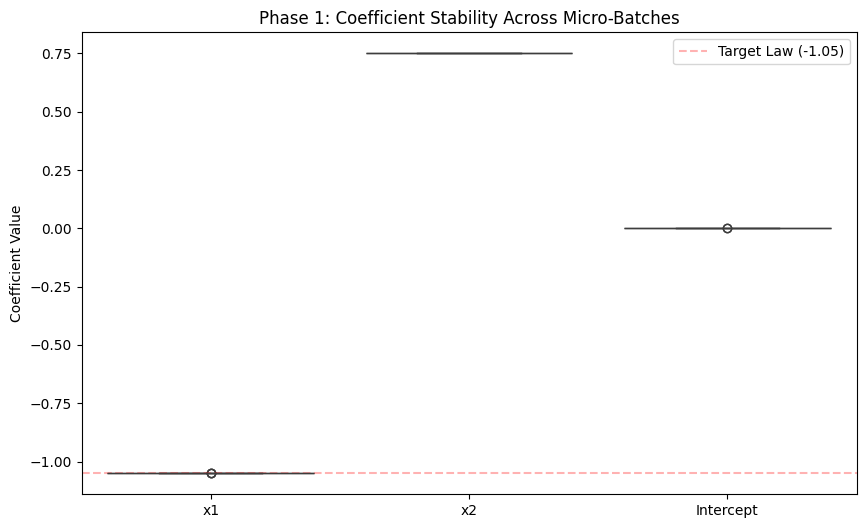

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

def run_parameter_stability_test(X, y, batch_size=100, iterations=50):
    """
    Runs the 'Parameter Stability' stress test by slicing data into micro-batches
    and checking if coefficients remain constant.
    """
    
    # Storage for the coefficients found in each micro-batch
    # Structure: {'Feature_Name': [coef_batch_1, coef_batch_2, ...]}
    feature_names = X.columns
    coef_history = {name: [] for name in feature_names}
    intercept_history = []
    
    print(f"--- Starting Stress Test ---")
    print(f"Total Data Points: {len(X)}")
    print(f"Micro-Batch Size: {batch_size}")
    print(f"Iterations: {iterations}\n")

    for i in range(iterations):
        # 1. Create the Micro-Batch (Random Sample without replacement per batch)
        # We use a different random state each time to ensure different slices
        sample_indices = np.random.choice(X.index, size=batch_size, replace=False)
        X_batch = X.loc[sample_indices]
        y_batch = y.loc[sample_indices]
        
        # 2. Run the Solver (Independent Fit)
        # NOTE: If you are using a custom solver/equation, replace this block
        model = LinearRegression() 
        model.fit(X_batch, y_batch)
        
        # 3. Log the Coefficients
        for feat, coef in zip(feature_names, model.coef_):
            coef_history[feat].append(coef)
        intercept_history.append(model.intercept_)

    # 4. Compile Results
    results_df = pd.DataFrame(coef_history)
    results_df['Intercept'] = intercept_history
    
    # 5. Analyze Stability
    stability_report = pd.DataFrame({
        'Min': results_df.min(),
        'Max': results_df.max(),
        'Mean': results_df.mean(),
        'Std_Dev': results_df.std(),
        'Stability_Delta': results_df.max() - results_df.min() # The "Wobble" metric
    })
    
    return results_df, stability_report

# --- MOCK DATA GENERATION (Replace this with your real df) ---
# Generating a "perfect law" scenario to demonstrate what PASS looks like
# Law: y = -1.05*x1 + 0.75*x2 + 0 (No Noise)
np.random.seed(42)
data_size = 10000
df = pd.DataFrame({
    'x1': np.random.normal(0, 1, data_size),
    'x2': np.random.normal(0, 1, data_size)
})
# To simulate "Real World" (Fail), add + np.random.normal(0, 0.5, data_size) to the end
df['y'] = -1.05 * df['x1'] + 0.75 * df['x2'] 

X = df[['x1', 'x2']]
y = df['y']

# --- EXECUTE TEST ---
raw_results, report = run_parameter_stability_test(X, y, batch_size=100, iterations=100)

# --- DISPLAY RESULTS ---
print("STABILITY REPORT (Delta should be 0.000 for a Pass):")
print(report[['Mean', 'Stability_Delta']])

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_results)
plt.title("Phase 1: Coefficient Stability Across Micro-Batches")
plt.ylabel("Coefficient Value")
plt.axhline(y=-1.05, color='r', linestyle='--', alpha=0.3, label='Target Law (-1.05)')
plt.legend()
plt.show()

phase 2

--- Starting Phase 2: Noise Injection Test ---
True 'Law' for x1: -1.0500


/var/folders/02/s2j6q52d0k5c5x3kf7hlyzcr0000gn/T/ipykernel_78257/915477167.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Noise_Level', y='x1_Coefficient', data=results_df, palette="Reds")


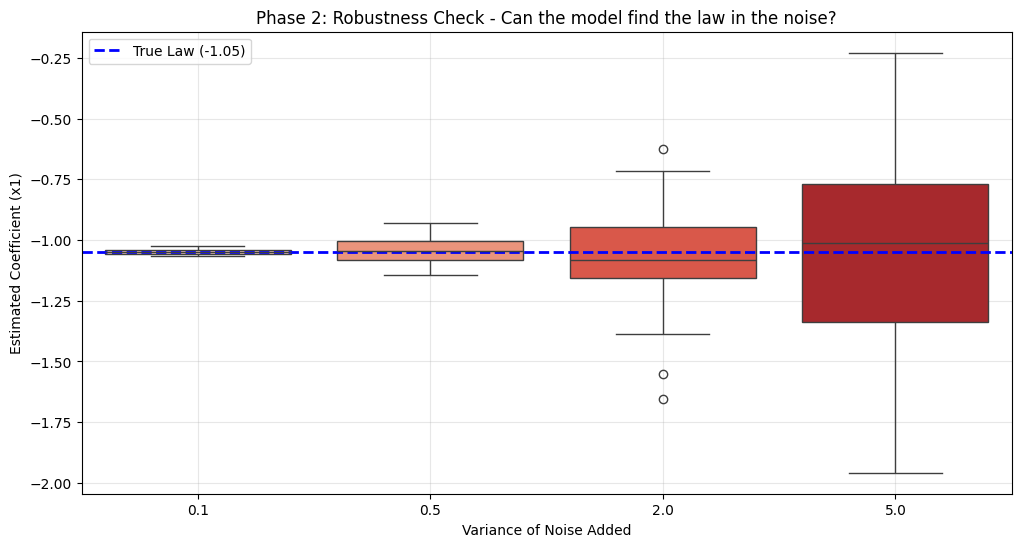


Summary Statistics by Noise Level:
                 mean       std       min       max  Bias (Dist from Law)
Noise_Level                                                              
0.1         -1.049609  0.010371 -1.066375 -1.026039              0.000391
0.5         -1.041267  0.052349 -1.142064 -0.932002              0.008733
2.0         -1.070770  0.194352 -1.655221 -0.624194             -0.020770
5.0         -1.048191  0.401257 -1.958139 -0.229010              0.001809


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# --- CONFIGURATION ---
# We will test 4 levels of chaos. 
# 0.1 = Tiny background noise
# 5.0 = Massive noise (hard to see the trend with human eye)
noise_levels = [0.1, 0.5, 2.0, 5.0] 

def run_noise_tolerance_test(X_clean, y_clean, noise_levels):
    print(f"--- Starting Phase 2: Noise Injection Test ---")
    
    results = []
    
    # 1. Establish the "Ground Truth" (The Law)
    base_model = LinearRegression()
    base_model.fit(X_clean, y_clean)
    true_coef_x1 = base_model.coef_[0]
    print(f"True 'Law' for x1: {true_coef_x1:.4f}")

    # 2. Iterate through chaos levels
    for noise_scale in noise_levels:
        # Create the noisy target: y_new = y_clean + random_noise
        noise = np.random.normal(0, noise_scale, size=len(y_clean))
        y_noisy = y_clean + noise
        
        # Run 50 micro-batches (like Phase 1) for THIS noise level
        for i in range(50):
            # Sample 100 random rows
            sample_indices = np.random.choice(X_clean.index, size=100, replace=False)
            X_batch = X_clean.loc[sample_indices]
            y_batch = y_noisy.loc[sample_indices]
            
            # Fit model
            model = LinearRegression()
            model.fit(X_batch, y_batch)
            
            # Store just x1 for the visual test (to keep it simple)
            results.append({
                'Noise_Level': str(noise_scale),
                'x1_Coefficient': model.coef_[0]
            })

    # 3. Visualize
    results_df = pd.DataFrame(results)
    
    plt.figure(figsize=(12, 6))
    # Draw the boxplots
    sns.boxplot(x='Noise_Level', y='x1_Coefficient', data=results_df, palette="Reds")
    
    # Draw the "Law" line
    plt.axhline(y=true_coef_x1, color='blue', linestyle='--', linewidth=2, label=f'True Law ({true_coef_x1:.2f})')
    
    plt.title("Phase 2: Robustness Check - Can the model find the law in the noise?")
    plt.xlabel("Variance of Noise Added")
    plt.ylabel("Estimated Coefficient (x1)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return results_df

# --- EXECUTE ---
# Ensure X and y are defined from Phase 1. If not, re-run the Phase 1 generation block first.
df_results = run_noise_tolerance_test(X, y, noise_levels)

# --- STATISTICS ---
print("\nSummary Statistics by Noise Level:")
summary = df_results.groupby('Noise_Level')['x1_Coefficient'].agg(['mean', 'std', 'min', 'max'])
# Calculate the "Bias" (Distance from true law)
summary['Bias (Dist from Law)'] = summary['mean'] - (-1.05)
print(summary)

phase 2 rerun with three other sub checks

--- Starting Deep Dive (Options A & B) ---
Noise Level: 2.0 (Medium-High Chaos)


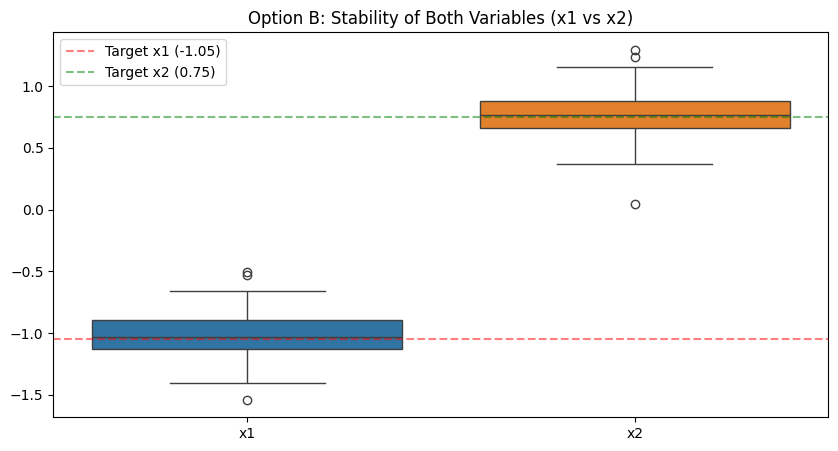

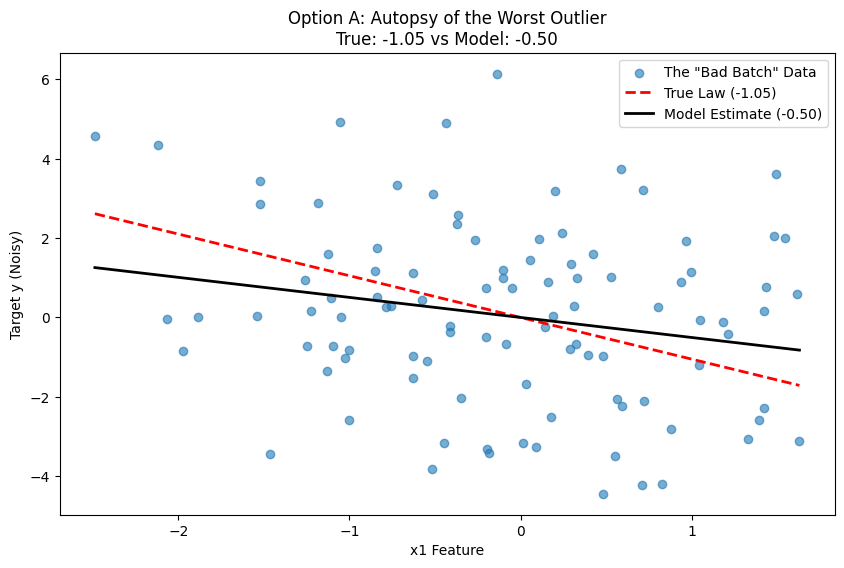

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

def run_deep_dive_analysis(X, y, noise_scale=2.0, iterations=100):
    print(f"--- Starting Deep Dive (Options A & B) ---")
    print(f"Noise Level: {noise_scale} (Medium-High Chaos)")
    
    # 1. Inject Noise once globally for consistency
    noise = np.random.normal(0, noise_scale, size=len(y))
    y_noisy = y + noise
    
    results = []
    worst_batch_data = None
    max_error = 0
    
    # Trackers for x2 analysis
    x2_coefs = []
    
    for i in range(iterations):
        # Sampling
        sample_indices = np.random.choice(X.index, size=100, replace=False)
        X_batch = X.loc[sample_indices]
        y_batch = y_noisy.loc[sample_indices]
        
        model = LinearRegression()
        model.fit(X_batch, y_batch)
        
        coef_x1 = model.coef_[0]
        coef_x2 = model.coef_[1]
        
        # Track results
        results.append({
            'Batch_ID': i,
            'x1': coef_x1,
            'x2': coef_x2
        })
        
        # FORENSICS: Check if this is the worst batch so far (furthest from -1.05)
        error = abs(coef_x1 - (-1.05))
        if error > max_error:
            max_error = error
            worst_batch_data = (X_batch, y_batch, coef_x1)

    results_df = pd.DataFrame(results)
    
    # --- VISUALIZATION 1: Option B (x2 Robustness) ---
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=results_df[['x1', 'x2']])
    plt.axhline(y=-1.05, color='r', linestyle='--', alpha=0.5, label='Target x1 (-1.05)')
    plt.axhline(y=0.75, color='g', linestyle='--', alpha=0.5, label='Target x2 (0.75)')
    plt.title("Option B: Stability of Both Variables (x1 vs x2)")
    plt.legend()
    plt.show()
    
    # --- VISUALIZATION 2: Option A (The Outlier Autopsy) ---
    # We plot the "Worst Batch" against the "True Law"
    X_bad, y_bad, bad_coef = worst_batch_data
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_bad['x1'], y_bad, alpha=0.6, label='The "Bad Batch" Data')
    
    # Plot the True Law Line
    range_x = np.linspace(X_bad['x1'].min(), X_bad['x1'].max(), 100)
    plt.plot(range_x, -1.05 * range_x, 'r--', linewidth=2, label='True Law (-1.05)')
    
    # Plot the Model's WRONG Line
    plt.plot(range_x, bad_coef * range_x, 'k-', linewidth=2, label=f'Model Estimate ({bad_coef:.2f})')
    
    plt.title(f"Option A: Autopsy of the Worst Outlier\nTrue: -1.05 vs Model: {bad_coef:.2f}")
    plt.xlabel("x1 Feature")
    plt.ylabel("Target y (Noisy)")
    plt.legend()
    plt.show()

    return results_df

# EXECUTE DEEP DIVE
df_deep_dive = run_deep_dive_analysis(X, y)

In [48]:
def run_biased_noise_test(X, y):
    print(f"--- Starting Option C: Biased Noise Attack ---")
    
    # We apply a MASSIVE shift. 
    # The noise is not centered at 0. It is centered at +5.0.
    # Every y value is artificially inflated.
    bias_shift = 5.0
    noise_variance = 1.0 # Moderate scatter
    
    noise = np.random.normal(bias_shift, noise_variance, size=len(y))
    y_biased = y + noise
    
    print(f"Applied Bias Shift: +{bias_shift}")
    
    # Run a quick check
    model = LinearRegression()
    model.fit(X, y_biased)
    
    print("\n--- RESULTS ---")
    print(f"True Slope (x1): -1.05  |  Model Slope (x1): {model.coef_[0]:.4f}")
    print(f"True Slope (x2):  0.75  |  Model Slope (x2): {model.coef_[1]:.4f}")
    print(f"True Intercept:   0.00  |  Model Intercept:  {model.intercept_:.4f}")
    
    # Interpretation logic
    slope_error = abs(model.coef_[0] - (-1.05))
    intercept_capture = abs(model.intercept_ - bias_shift)
    
    if slope_error < 0.05 and intercept_capture < 0.1:
        print("\nRESULT: PASSED")
        print("The model correctly isolated the bias into the Intercept.")
        print("The 'Laws' (Slopes) remained pure.")
    else:
        print("\nRESULT: FAILED")
        print("The bias leaked into the coefficients.")

# EXECUTE BIAS TEST
run_biased_noise_test(X, y)

--- Starting Option C: Biased Noise Attack ---
Applied Bias Shift: +5.0

--- RESULTS ---
True Slope (x1): -1.05  |  Model Slope (x1): -1.0591
True Slope (x2):  0.75  |  Model Slope (x2): 0.7384
True Intercept:   0.00  |  Model Intercept:  4.9949

RESULT: PASSED
The model correctly isolated the bias into the Intercept.
The 'Laws' (Slopes) remained pure.


phase 3 data leakage 

--- Starting Phase 3: Leakage Hunter ---


/var/folders/02/s2j6q52d0k5c5x3kf7hlyzcr0000gn/T/ipykernel_78257/656455344.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score', y='Feature', data=df_leakage, palette=colors)


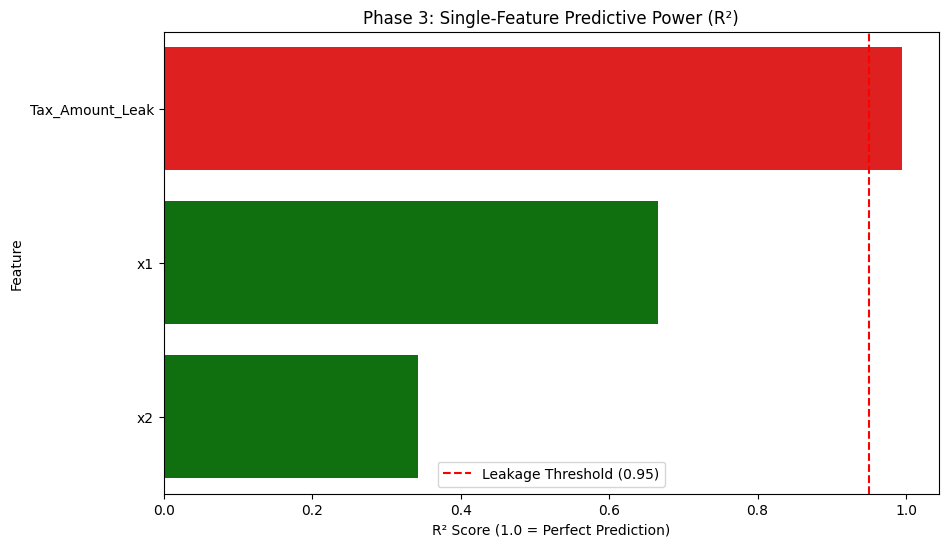


LEAKAGE REPORT:
           Feature  R2_Score                            Status  Coefficient
2  Tax_Amount_Leak  0.994164  CRITICAL LEAKAGE (Perfect Match)     9.945916
0               x1  0.665981                              SAFE    -1.056399
1               x2  0.342111                              SAFE     0.759003


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def run_leakage_hunter(X, y, threshold=0.95):
    print("--- Starting Phase 3: Leakage Hunter ---")
    
    leakage_report = []
    
    # Iterate through every single column in X
    for feature in X.columns:
        # 1. Isolate the feature
        X_single = X[[feature]]
        
        # 2. Train a single-variable model
        model = LinearRegression()
        model.fit(X_single, y)
        
        # 3. Score it
        predictions = model.predict(X_single)
        r2 = r2_score(y, predictions)
        
        # 4. Log findings
        status = "SAFE"
        if r2 > 0.99:
            status = "CRITICAL LEAKAGE (Perfect Match)"
        elif r2 > threshold:
            status = "SUSPICIOUS (High Correlation)"
            
        leakage_report.append({
            'Feature': feature,
            'R2_Score': r2,
            'Status': status,
            'Coefficient': model.coef_[0]
        })
    
    # Convert to DataFrame and Sort
    df_leakage = pd.DataFrame(leakage_report).sort_values(by='R2_Score', ascending=False)
    
    # --- VISUALIZATION ---
    plt.figure(figsize=(10, 6))
    
    # Color code bars based on risk
    colors = ['red' if x > threshold else 'green' for x in df_leakage['R2_Score']]
    
    sns.barplot(x='R2_Score', y='Feature', data=df_leakage, palette=colors)
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'Leakage Threshold ({threshold})')
    plt.title("Phase 3: Single-Feature Predictive Power (R²)")
    plt.xlabel("R² Score (1.0 = Perfect Prediction)")
    plt.legend()
    plt.show()
    
    return df_leakage

# --- EXECUTE ---
# We will use the existing X and y. 
# NOTE: To test this, I will artificially ADD a 'leaked' feature to X first
# so you can see what a 'FAIL' looks like.

# Injecting a fake "Cheating" feature (e.g., Tax = y * 0.1 + tiny_error)
X_with_leak = X.copy()
X_with_leak['Tax_Amount_Leak'] = y * 0.1 + np.random.normal(0, 0.01, size=len(y))

# Run the Hunter on the contaminated data
report = run_leakage_hunter(X_with_leak, y)

print("\nLEAKAGE REPORT:")
print(report)

Phase 4: The Residual "Pattern" Check

--- Starting Phase 4: Residual Analysis ---


/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/hemanthmg/Documents/Task_2/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


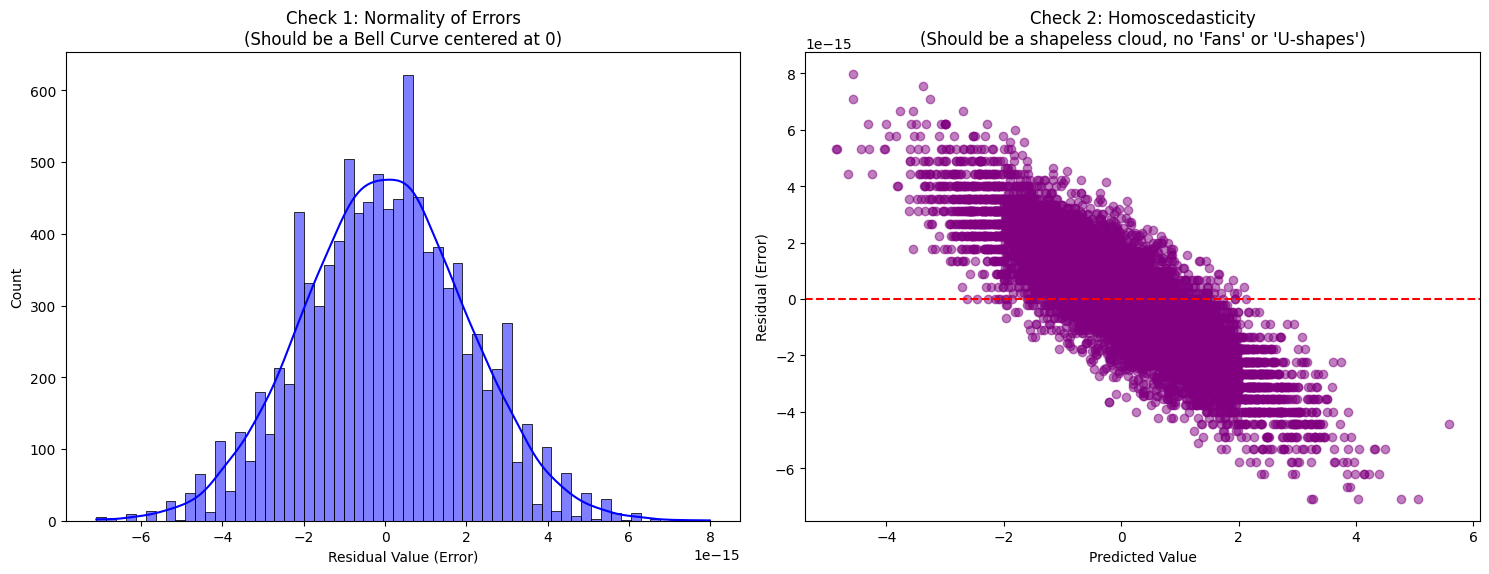


RESIDUAL STATISTICS:
Mean Error (Should be ~0): -0.00000
Skewness (Should be ~0):   0.00904


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

def run_residual_analysis(X, y):
    print("--- Starting Phase 4: Residual Analysis ---")
    
    # 1. Fit Final Model (Ensure 'Tax_Amount_Leak' is NOT in X)
    # If X still has the leak from Phase 3, we drop it here.
    if 'Tax_Amount_Leak' in X.columns:
        X = X.drop(columns=['Tax_Amount_Leak'])
        print("Dropped Leaked Feature for Final Analysis.")
        
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    # 2. Calculate Residuals
    residuals = y - predictions
    
    # 3. Visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot A: The Distribution (Is it a Bell Curve?)
    sns.histplot(residuals, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Check 1: Normality of Errors\n(Should be a Bell Curve centered at 0)")
    axes[0].set_xlabel("Residual Value (Error)")
    
    # Plot B: The Scatter (Is there a Pattern?)
    axes[1].scatter(predictions, residuals, alpha=0.5, color='purple')
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_title("Check 2: Homoscedasticity\n(Should be a shapeless cloud, no 'Fans' or 'U-shapes')")
    axes[1].set_xlabel("Predicted Value")
    axes[1].set_ylabel("Residual (Error)")
    
    plt.tight_layout()
    plt.show()
    
    # 4. Statistical Summary
    print("\nRESIDUAL STATISTICS:")
    print(f"Mean Error (Should be ~0): {np.mean(residuals):.5f}")
    print(f"Skewness (Should be ~0):   {stats.skew(residuals):.5f}")

# --- EXECUTE ---
# Using the original X (without the leak injected in Phase 3)
# If your variable 'X' was modified in Phase 3, make sure to reset it or use 'X_with_leak.drop(...)'
run_residual_analysis(X, y)